## Проект "Анализ бизнес-показателей"

## Задачи исследования:

Заказчик: развлекательное приложение Procrastinate Pro+.  
Определенная проблема: несмотря на огромные вложения в рекламу, последние несколько месяцев приложение терпит убытки.  
Задача: разобраться в причинах и помочь компании выйти в плюс.  

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:  
*	лог сервера с данными об их посещениях,
*	выгрузка их покупок за этот период,
*	рекламные расходы.  

Необходимо изучить:  
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

### 1. Загрузка данных и подготовка к анализу

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).


In [1]:
#импорт библиотек для работы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
#загрузка данных
try:    
    visits = pd.read_csv('https://raw.githubusercontent.com/Zarayskaya/analysis-of-business-indicators/main/visits_info_short.csv')
    orders = pd.read_csv('https://raw.githubusercontent.com/Zarayskaya/analysis-of-business-indicators/main/orders_info_short.csv')
    costs = pd.read_csv('https://raw.githubusercontent.com/Zarayskaya/analysis-of-business-indicators/main/costs_info_short.csv')
except FileNotFoundError:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

К представленным датасетам идут следующие аннотации:  
Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.
  
*Структура visits_info_short.csv:*  
* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.  

*Структура orders_info_short.csv:*
* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.  

*Структура costs_info_short.csv:*
* dt — дата проведения рекламной кампании,
* Channel — идентификатор рекламного источника,
* costs — расходы на эту кампанию.

In [3]:
#знакомство с датасетами
def data_info(data):
    display(data.head(20)), data.info(), display(data.describe()), print(data.duplicated().sum())
data_info(visits)

User Id         Region   Device         Channel        Session Start  \
0   981449118918  United States   iPhone         organic  2019-05-01 02:36:01   
1   278965908054  United States   iPhone         organic  2019-05-01 04:46:31   
2   590706206550  United States      Mac         organic  2019-05-01 14:09:25   
3   326433527971  United States  Android          TipTop  2019-05-01 00:29:59   
4   349773784594  United States      Mac         organic  2019-05-01 03:33:35   
5    90242400005  United States   iPhone  RocketSuperAds  2019-05-01 07:14:52   
6    43958116050  United States  Android         organic  2019-05-01 09:03:21   
7   185365244969  United States   iPhone         organic  2019-05-01 09:37:03   
8   446013509831  United States   iPhone  RocketSuperAds  2019-05-01 10:26:00   
9   100970711362  United States      Mac          TipTop  2019-05-01 04:39:53   
10  589320347244  United States      Mac         YRabbit  2019-05-01 18:39:23   
11  370455852550  United States   iPhone         organic  2019-05-01 14:44:30   
12  141837741427  United States      Mac        FaceBoom  2019-05-01 06:20:48   
13  924308873083  United States   iPhone         organic  2019-05-01 20:03:52   
14  774938424092  United States   iPhone    MediaTornado  2019-05-01 14:01:40   
15  244878945432  United States   iPhone    MediaTornado  2019-05-01 01:59:41   
16  157877034671  United States      Mac         organic  2019-05-01 10:25:16   
17  321335574694  United States   iPhone         YRabbit  2019-05-01 09:49:32   
18  524629398969  United States      Mac         organic  2019-05-01 17:06:46   
19  136226778935  United States       PC         organic  2019-05-01 19:34:45   

            Session End  
0   2019-05-01 02:45:01  
1   2019-05-01 04:47:35  
2   2019-05-01 15:32:08  
3   2019-05-01 00:54:25  
4   2019-05-01 03:57:40  
5   2019-05-01 08:19:56  
6   2019-05-01 10:08:39  
7   2019-05-01 10:00:43  
8   2019-05-01 10:59:17  
9   2019-05-01 04:57:05  
10  2019-05-01 20:03:15  
11  2019-05-01 15:41:24  
12  2019-05-01 06:54:33  
13  2019-05-01 20:19:34  
14  2019-05-01 14:29:24  
15  2019-05-01 02:21:50  
16  2019-05-01 10:35:03  
17  2019-05-01 10:10:02  
18  2019-05-01 18:05:31  
19  2019-05-01 19:39:24

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


User Id
count  3.099010e+05
mean   4.997664e+11
std    2.887899e+11
min    5.993260e+05
25%    2.493691e+11
50%    4.989906e+11
75%    7.495211e+11
max    9.999996e+11

0


(None, None, None, None)

In [4]:
#знакомство с датасетами
data_info(orders)

User Id             Event Dt  Revenue
0   188246423999  2019-05-01 23:09:52     4.99
1   174361394180  2019-05-01 12:24:04     4.99
2   529610067795  2019-05-01 11:34:04     4.99
3   319939546352  2019-05-01 15:34:40     4.99
4   366000285810  2019-05-01 13:59:51     4.99
5   129100331057  2019-05-01 01:56:28     4.99
6   626807144131  2019-05-01 02:39:21     4.99
7   914062168985  2019-05-01 02:02:18     4.99
8   769669137453  2019-05-01 03:39:47     4.99
9   434198630691  2019-05-01 18:16:50     5.99
10  846285993293  2019-05-01 13:14:07     4.99
11   64474110919  2019-05-01 02:21:45     4.99
12   68752468250  2019-05-01 20:25:33     4.99
13  946239768828  2019-05-01 21:11:24     4.99
14  872148430066  2019-05-01 09:18:02     4.99
15   29144643737  2019-05-01 09:56:07     4.99
16  784328289169  2019-05-01 16:52:30     4.99
17  645547903112  2019-05-01 05:54:57     4.99
18   59058997486  2019-05-01 11:00:21     4.99
19  784885401335  2019-05-02 06:30:36     4.99

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


User Id       Revenue
count  4.021200e+04  40212.000000
mean   4.990295e+11      5.370608
std    2.860937e+11      3.454208
min    5.993260e+05      4.990000
25%    2.511324e+11      4.990000
50%    4.982840e+11      4.990000
75%    7.433327e+11      4.990000
max    9.998954e+11     49.990000

0


(None, None, None, None)

In [5]:
#знакомство с датасетами
data_info(costs)

dt   Channel  costs
0   2019-05-01  FaceBoom  113.3
1   2019-05-02  FaceBoom   78.1
2   2019-05-03  FaceBoom   85.8
3   2019-05-04  FaceBoom  136.4
4   2019-05-05  FaceBoom  122.1
5   2019-05-06  FaceBoom  118.8
6   2019-05-07  FaceBoom  101.2
7   2019-05-08  FaceBoom  100.1
8   2019-05-09  FaceBoom   93.5
9   2019-05-10  FaceBoom  104.5
10  2019-05-11  FaceBoom  132.0
11  2019-05-12  FaceBoom  100.1
12  2019-05-13  FaceBoom  105.6
13  2019-05-14  FaceBoom   92.4
14  2019-05-15  FaceBoom  100.1
15  2019-05-16  FaceBoom  110.0
16  2019-05-17  FaceBoom  101.2
17  2019-05-18  FaceBoom  117.7
18  2019-05-19  FaceBoom  128.7
19  2019-05-20  FaceBoom   99.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


costs
count  1800.000000
mean     58.609611
std     107.740223
min       0.800000
25%       6.495000
50%      12.285000
75%      33.600000
max     630.000000

0


(None, None, None, None)

В данных отсутствуют пропуски, явные дубликаты. Но при этом есть некорректные форматы значений и названия столбцов неудобны для работы.

In [6]:
#приведение названия столбцов к удобному для работы виду
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

In [7]:
#замена формата данных в столбцах с датами
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

Так как есть строковые значения, стоит проверить датасеты на неявные дубликаты (опечатки):

In [8]:
#проверка строковых столбцов на неявные дубликаты
display(
    visits['region'].unique(),
    visits['device'].unique(),
    visits['channel'].unique(),
    costs['channel'].unique()
)

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Все названия уникальны, дубликатов нет.

Также стоит проверить столбцы с датами на адекватность данных - нет ли странных выбивающихся значений.

In [9]:
#проверка столбцов с датами на аномальные значения и соответствие друг другу
display(
    visits['session_start'].min(), visits['session_start'].max(),
    visits['session_end'].min(), visits['session_end'].max(),
    orders['event_dt'].min(), orders['event_dt'].max(),
    costs['dt'].min(), costs['dt'].max()
)

Timestamp('2019-05-01 00:00:41')

Timestamp('2019-10-31 23:59:23')

Timestamp('2019-05-01 00:07:06')

Timestamp('2019-11-01 01:38:46')

Timestamp('2019-05-01 00:28:11')

Timestamp('2019-10-31 23:56:56')

Timestamp('2019-05-01 00:00:00')

Timestamp('2019-10-27 00:00:00')

Все минимальные и максимальные даты соответствуют выгрузке.

В последнюю очередь проверим столбцы с ценами на наличие аномальных значений:

In [10]:
#проверка ценовых столбцов на аномалии
orders.groupby('revenue').agg('count')

user_id  event_dt
revenue                   
4.99       38631     38631
5.99         780       780
9.99         385       385
19.99        204       204
49.99        212       212

Столбец с ценами рекламных кампаний проверим с помощью диаграммы размаха:

<AxesSubplot:>

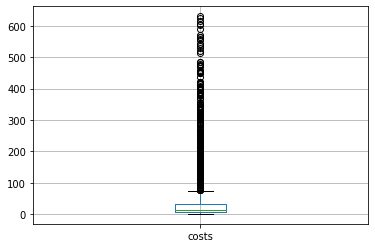

In [11]:
#проверка ценовых столбцов на аномалии
costs.boxplot(column='costs')

Выбросы достаточно плотные и равномерные, также отсутствуют аномалии.

### Общий вывод:  
Данные не имеют аномалий, пропусков и дубликатов, полностью пригодны для проведения исследования.

### 2. Объявление функций для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Задаем функции:

In [12]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = pd.to_datetime(profiles['first_ts'].dt.date)  #пришлось корректировать здесь, без to_datetime не работало
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [13]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date and channel != "organic"')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [14]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date and channel != "organic"')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [15]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [16]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [17]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [18]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [19]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2, legend=False)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3, legend=False)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5, legend=False)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### 3. Исследовательский анализ данных

- Составление профилей пользователей. Определение минимальной и максимальной даты привлечения пользователей.
- Определение, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.
- Определение, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.
- Изучение рекламных источников привлечения и определение каналов, из которых пришло больше всего платящих пользователей.


In [20]:
#создание профилей пользователей
profiles = get_profiles(visits, orders, costs)

In [21]:
#проверка получившихся профилей
print(profiles.head(), profiles.shape)

    user_id            first_ts     channel  device         region         dt  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States 2019-05-07   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France 2019-10-01   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States 2019-10-02   

       month  payer  acquisition_cost  
0 2019-05-01   True          1.088172  
1 2019-07-01  False          1.107237  
2 2019-10-01  False          0.000000  
3 2019-08-01  False          0.988235  
4 2019-10-01  False          0.230769   (150008, 9)


In [22]:
#определение минимальной и максимальной даты привлечения пользователей
min_acquisition_date = profiles['dt'].min()
max_acquisition_date = profiles['dt'].max()
print(min_acquisition_date, max_acquisition_date)

2019-05-01 00:00:00 2019-10-27 00:00:00


В общей сумме получилось 150 тысяч профилей пользователей, из 309 тысяч визитов. Минимальная и максимальная даты привлчения пользователей соответствуют предоставленной информации.  
Профили содержат всю необходимую информацию для обработки и решения поставленных задач.

#### 1: Определение, из каких стран приходят пользователи, и какая страна имеет наибольшую долю платящих пользователей

In [23]:
#строим сводную таблицу, группируя профили по региону
region_payers = profiles.pivot_table(index='region', values='payer', aggfunc=('count','sum','mean'))
region_payers = region_payers.rename(columns={'count':'all_users', 'sum':'payers', 'mean':'payers_percent'})
region_payers['payers_percent'] = round(region_payers['payers_percent']*100,2)
#выводим таблицу
display(region_payers.sort_values(by='payers_percent'))

all_users  payers_percent  payers
region                                          
France             17450            3.80     663
UK                 17575            3.98     700
Germany            14981            4.11     616
United States     100002            6.90    6902

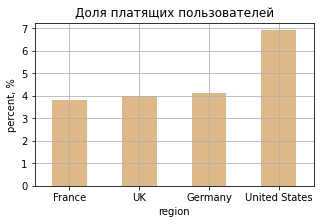

In [24]:
#для удобства восприятия строим столбчатый график
region_payers['payers_percent'].sort_values().plot(grid=True, kind='bar',figsize=(6,4), color='burlywood');

plt.title('Доля платящих пользователей');
plt.xticks(rotation=0);
plt.ylabel('percent, %');
plt.show()

Две трети всех польхователей - жители соединенных штатов. Оставшаяся треть почти равномерно распределена между жителями Европейских стран и Великобритании. Процент платящих пользователей также выше у пользователей из США, а пользователи из Германии, Франции и Британии - равномерно меньше конвертируются в покупателей.

#### 2: Определение, какими устройствами пользуются клиенты, и какие устройства предпочитают платящие пользователи

all_users  payers_percent  payers
device                                    
PC           30455            5.05    1537
Android      35032            5.85    2050
iPhone       54479            6.21    3382
Mac          30042            6.36    1912

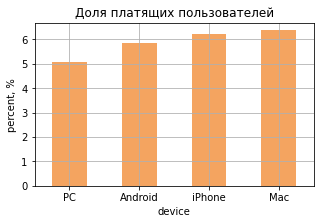

In [25]:
#строим сводную таблицу, группируя профили по устройству
device_payers = profiles.pivot_table(index='device', values='payer', aggfunc=('count','sum','mean'))
device_payers = device_payers.rename(columns={'count':'all_users', 'sum':'payers', 'mean':'payers_percent'})
device_payers['payers_percent'] = round(device_payers['payers_percent']*100,2)
#выводим таблицу
display(device_payers.sort_values(by='payers_percent'))
#для удобства восприятия строим столбчатый график
device_payers['payers_percent'].sort_values().plot(grid=True, kind='bar',figsize=(5,3), color='sandybrown');

plt.title('Доля платящих пользователей');
plt.xticks(rotation=0);
plt.ylabel('percent, %');
plt.show()

Наибольшее число пользователей - владельцы Айфонов, далее идут пользователи мобильных устройств на Андроид платформе, на третьем месте равномерно распределены пользователи, заходящие в приложение с ноутбуков или ПК.  
Однако интересно, что наивысший процент конвертации в покупателей у пользователей компьютеров Мас, Айфон - на втором месте.  

**Получается, что посещение приложения удобнее с мобильного устройства, однако конвертируемость в покупателя лучше у пользователей Apple. Возможно, такая зависимость связана с более удобной интеграцией с Apple Pay**

#### 3: Изучение рекламных источников и определение каналов, из которых пришло наибольшее количество платящих пользователей

all_users  payers_percent  payers
channel                                              
organic                 56439            2.06    1160
OppleCreativeMedia       8605            2.71     233
LeapBob                  8553            3.06     262
MediaTornado             4364            3.57     156
YRabbit                  4312            3.83     165
WahooNetBanner           8553            5.30     453
RocketSuperAds           4448            7.91     352
TipTop                  19561            9.60    1878
lambdaMediaAds           2149           10.47     225
AdNonSense               3880           11.34     440
FaceBoom                29144           12.20    3557

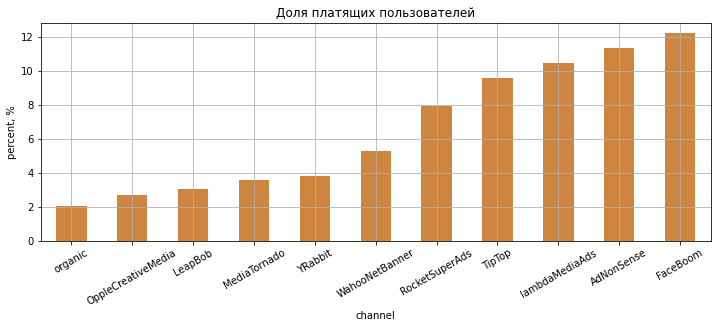

In [26]:
#строим сводную таблицу, группируя профили по каналу привлечения
channel_payers = profiles.pivot_table(index='channel', values='payer', aggfunc=('count','sum','mean'))
channel_payers = channel_payers.rename(columns={'count':'all_users', 'sum':'payers', 'mean':'payers_percent'})
channel_payers['payers_percent'] = round(channel_payers['payers_percent']*100,2)
#выводим таблицу
display(channel_payers.sort_values(by='payers_percent'))
#для удобства восприятия строим столбчатый график
channel_payers['payers_percent'].sort_values().plot(grid=True, kind='bar',figsize=(12,4), color='peru');

plt.title('Доля платящих пользователей');
plt.xticks(rotation=30);
plt.ylabel('percent, %');
plt.show()

Отвечая на вопрос "какие каналы лиидируют по проценту привлечения платящих пользователей", можно выделить топ-5 каналов: FaceBoom, AdNonSense, lambdaMediaAds, TipTop и RocketSuperAds. Конверсия этих каналов от 8%. Однако стоит обратить внимание на таблицу - среди каналов-лидеров по проценту конверсии из пользователя в покупателя есть каналы AdNonSense, lambdaMediaAds и RocketSuperAds, где общее количество привлеченных пользователей много меньше, чем у каналов, не входящих в топ-5.  

**Стоит оценить, почему у трех каналов AdNonSense, lambdaMediaAds и RocketSuperAds так мало привлеченных пользователей, и возможно, рекомендовать развивать трафик именно через них.**

## Для дальнейшего изучения:
- конверсия пользователей, использующих Android и PC
- более глубокий анализ топ-5 каналов привлечения пользователей
- детальное рассмотрение удержания пользователей, привлеченных через три недооцененных канала

### 4. Маркетинговое исследование

- Расчет общей суммы расходов на маркетинг.
- Разделение трат в разрезе рекламных источников. Выявление самых дорогостоящих каналов привлечения.
- Построение визуализации динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.
- Определение средней стоимости привлечения одного пользователя (CAC) из каждого источника.


In [27]:
#считаем общие траты на маркетинг
total_marketing_expenses = round(costs['costs'].sum(),2)
print(total_marketing_expenses)

105497.3


Цифра общих трат - 105,5 тысяч долларов. Стоит анализировать дальнейшие цифры, помня про общее.

#### 1: Разделение трат в разрезе рекламных источников.

In [28]:
#строим сводную таблицу, группируя данные по каналу привлечения
channel_costs = costs.pivot_table(index='channel', values='costs', aggfunc='sum', margins=True)

display(channel_costs.sort_values(by='costs'))

costs
channel                      
YRabbit                944.22
MediaTornado           954.48
lambdaMediaAds        1557.60
LeapBob               1797.60
RocketSuperAds        1833.00
OppleCreativeMedia    2151.25
AdNonSense            3911.25
WahooNetBanner        5151.00
FaceBoom             32445.60
TipTop               54751.30
All                 105497.30

Больше трети всех трат на рекламу - по каналу TipTop, который хоть и входит в топ-5 по конвертации пользователей в покупатели, но не является лидером.  
Второе место и более 1/5 всего рекламного бюджета уходит на канал FaceBoom, который лидирует по конверсии в покупателей.
Однако стоит заметить, что бюджет еще трех каналов-лидеров - AdNonSense, lambdaMediaAds и RocketSuperAds, даже в сумме не превосходит затраты на FaceBoom.  
**Явно видно неправильное распределение рекламного бюджета.**

#### 2: Визуализация динамики изменения расходов по неделям и месяцам.

In [29]:
#добавляем в датасет с рекламными компаниями необходимые столбцы и проверяем корректность:
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month
print(costs.head())

          dt   channel  costs  week  month
0 2019-05-01  FaceBoom  113.3    18      5
1 2019-05-02  FaceBoom   78.1    18      5
2 2019-05-03  FaceBoom   85.8    18      5
3 2019-05-04  FaceBoom  136.4    18      5
4 2019-05-05  FaceBoom  122.1    18      5


In [30]:
#строим таблицу, группируя данные по каналу, месяцу и неделе:
costs_dynamics = costs.groupby(['channel','month','week']).agg({'costs':'sum'})
display(costs_dynamics)

costs
channel        month week        
AdNonSense     5     18    211.05
                     19    273.00
                     20    265.65
                     21    266.70
                     22    153.30
...                           ...
lambdaMediaAds 9     40      7.20
               10    40     52.00
                     41     60.80
                     42     47.20
                     43     53.60

[300 rows x 1 columns]

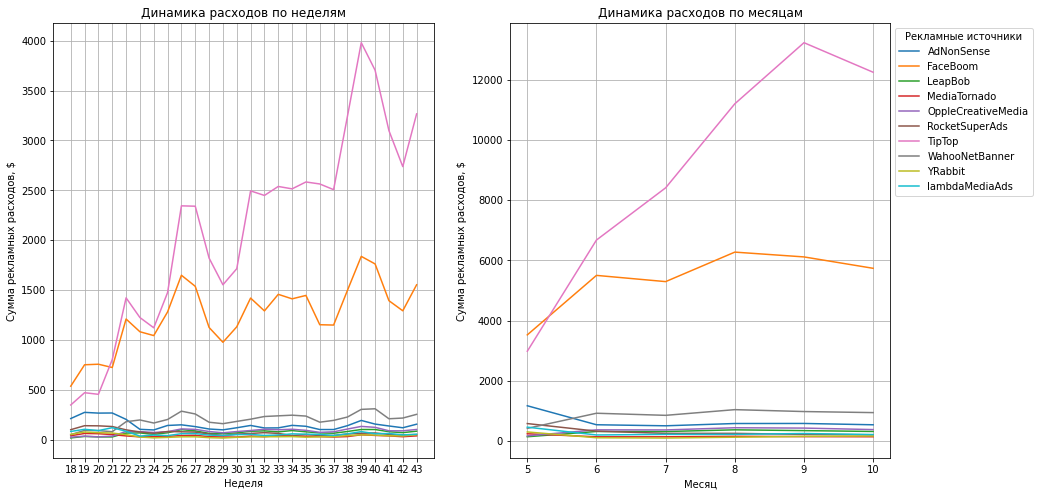

In [31]:
#строим графики динамики изменения расходов на рекламу по каждому каналу по неделе и месяцу:

plt.figure(figsize=(15,8));

#группируем данные по неделям
weekly_costs_dynamics = costs_dynamics.pivot_table(index='channel', columns='week', values='costs', aggfunc='sum')
weekly_costs_dynamics.T \
    .plot(grid=True, xticks=list(weekly_costs_dynamics.columns.values), ax=plt.subplot(1,2,1), legend=False);
plt.title('Динамика расходов по неделям');
plt.ylabel('Сумма рекламных расходов, $');
plt.xlabel('Неделя');

#группируем данные по месяцам
monthly_costs_dynamics = costs_dynamics.pivot_table(index='channel', columns='month', values='costs', aggfunc='sum')
monthly_costs_dynamics.T \
    .plot(grid=True, xticks=list(monthly_costs_dynamics.columns.values), ax=plt.subplot(1,2,2));
plt.title('Динамика расходов по месяцам');
plt.ylabel('Сумма рекламных расходов, $');
plt.xlabel('Месяц');
plt.legend(bbox_to_anchor=(1,1), loc='upper left', title='Рекламные источники');

plt.show()

По всем рекламным каналам, кроме FaceBoom и TipTop, недельные траты не превышают даже 300 долл, в то время как вложения в TipTop на 40й неделе достигли почти 4000 долл. Причем канал продолжали "раздувать" с мая по сентябрь.  

А, например, перспективный и входящий в топ-5 каналов AdNonSense, уже с 21 недели начинает получать меньший бюджет, чем на старте.  

Среди каналов с малым финансированием, стабильно более высокие траты у WahooNetBanner, который также имеет низкую конверсию пользователь-покупатель.  

Отделом маркетинга явно выбраны неверные стратегии финансирования рекламных кампаний по каналам привлечения.

#### 3: Определение средней стоимости привлечения пользователя (САС) по каждому источнику.

cac
channel                     
TipTop              2.799003
FaceBoom            1.113286
AdNonSense          1.008054
lambdaMediaAds      0.724802
WahooNetBanner      0.602245
RocketSuperAds      0.412095
OppleCreativeMedia  0.250000
YRabbit             0.218975
MediaTornado        0.218717
LeapBob             0.210172
All                 1.127481

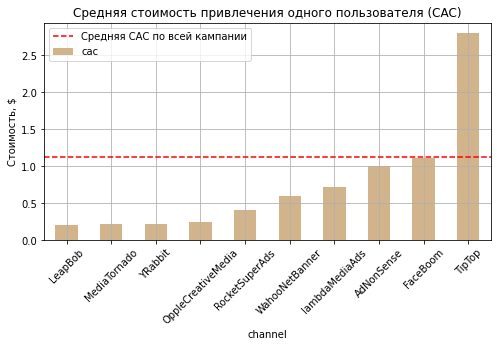

In [32]:
#строим Customer Acquisition Cost таблицу
cac = (
    profiles.query('channel != "organic"')
    .pivot_table(index='channel', values = 'acquisition_cost', aggfunc='mean', margins=True)
    .rename(columns={'acquisition_cost':'cac'})
)
#отображаем таблицу
display(
    cac[cac.index !='All']
    .sort_values(by='cac', ascending=False)
    .append(cac[cac.index =='All'])
)

#строим график средних САС в разрезе по каналам
(
    cac[cac.index !='All']
    .sort_values(by='cac')
    .plot(kind='bar', grid=True, color='tan', figsize=(8,4))
);
plt.xticks(rotation=45);
plt.ylabel('Стоимость, $');
#добавляем сравнение со средним САС по всей рекламной кампании
plt.axhline(y=cac[cac.index=='All']['cac'][0], color='red', linestyle='--', label='Средняя САС по всей кампании')
plt.title('Средняя стоимость привлечения одного пользователя (CAC)');
plt.legend();
plt.show()

Как и ожидалось - самые "дорогие" пользователи у TipTop и FaceBoom, но при этом САС пользователя, привлеченного через FaceBoom не превосходит среднюю САС по всем пользователям. А вот TipTop сильно превышает.  
В топ-5 по стоимости пользователя также входит канал WahooNetBanner, который не входит при этом в ТОП-5 по конверсии.  
Глядя на такие результаты, хочется порекомендовать отключить рекламу в TipTop уже сейчас, но стоит ознакомиться подробнее.

## Для дальнейшего изучения:
- Причины огромного бюджета для канала Tip Top и огромной стоимости покупателя (что с конверсией по каналу?)
- Также оценить, почему у канала FaceBoom также большой бюджет.

### 5. Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Анализ производится 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.


Этапы:
- Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверить конверсию пользователей и динамику её изменения. То же самое сделать с удержанием пользователей. Построить и изучить графики конверсии и удержания.
- Проанализировать окупаемость рекламы с разбивкой по устройствам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализировать окупаемость рекламы с разбивкой по странам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализировать окупаемость рекламы с разбивкой по рекламным каналам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответить на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

In [33]:
#задаем момент и горизонт анализа
horizon_days=14
observation_date = datetime(2019, 11, 1).date()

#### 1: Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [34]:
#получаем таблицы Lifetime Value и Return On Investment
(ltv_raw,
ltv,
ltv_history,
roi,
roi_history) = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days)

In [35]:
display(ltv_raw.head(), ltv.head(), ltv_history.head(), roi.head(), roi_history.head())

user_id            first_ts   channel  device         region         dt  \
0   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States 2019-05-07   
1   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States 2019-05-07   
2   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States 2019-05-07   
3  4919697 2019-07-09 12:46:07  FaceBoom  iPhone  United States 2019-07-09   
4  6085896 2019-10-01 09:58:33   organic  iPhone         France 2019-10-01   

       month  payer  acquisition_cost            event_dt  revenue  lifetime  \
0 2019-05-01   True          1.088172 2019-05-07 20:59:09     4.99       0.0   
1 2019-05-01   True          1.088172 2019-05-08 06:01:28     4.99       0.0   
2 2019-05-01   True          1.088172 2019-05-09 07:34:01     4.99       1.0   
3 2019-07-01  False          1.107237                 NaT      NaN       NaN   
4 2019-10-01  False          0.000000                 NaT      NaN       NaN   

      cohort  
0  All users  
1  All users  
2  All users  
3  All users  
4  All users

cohort_size       0.0       1.0       2.0       3.0       4.0  \
cohort                                                                     
All users       142620  0.241267  0.310905  0.364073  0.408661  0.447512   

                5.0       6.0       7.0       8.0       9.0      10.0  \
cohort                                                                  
All users  0.481909  0.513263  0.541481  0.569211  0.594565  0.617813   

               11.0      12.0      13.0  
cohort                                   
All users  0.639767  0.661289  0.680757

cohort_size       0.0       1.0       2.0       3.0       4.0  \
dt                                                                          
2019-05-01          909  0.160297  0.215193  0.260209  0.294246  0.316205   
2019-05-02          758  0.157995  0.302942  0.335858  0.381939  0.408272   
2019-05-03          849  0.165748  0.249211  0.326796  0.379694  0.503227   
2019-05-04         1015  0.232138  0.286217  0.315714  0.359970  0.459369   
2019-05-05          970  0.140969  0.229546  0.244979  0.265557  0.291278   

                 5.0       6.0       7.0       8.0       9.0      10.0  \
dt                                                                       
2019-05-01  0.316205  0.327184  0.338163  0.382079  0.426029  0.469945   
2019-05-02  0.441201  0.454367  0.493865  0.526781  0.546530  0.572863   
2019-05-03  0.550259  0.556137  0.562014  0.591402  0.620789  0.632544   
2019-05-04  0.518365  0.528197  0.557695  0.582276  0.601941  0.616690   
2019-05-05  0.317000  0.332433  0.347866  0.353010  0.363299  0.389021   

                11.0      12.0      13.0  
dt                                        
2019-05-01  0.502882  0.508372  0.524840  
2019-05-02  0.579446  0.592612  0.612361  
2019-05-03  0.667809  0.691319  0.708952  
2019-05-04  0.656020  0.656020  0.690433  
2019-05-05  0.399309  0.419887  0.425031

cohort_size       cac       0.0       1.0       2.0      3.0  \
cohort                                                                    
All users       142620  0.694753  0.347269  0.447504  0.524031  0.58821   

                4.0      5.0       6.0       7.0       8.0       9.0  \
cohort                                                                 
All users  0.644131  0.69364  0.738771  0.779386  0.819299  0.855793   

               10.0      11.0      12.0      13.0  
cohort                                             
All users  0.889256  0.920855  0.951833  0.979855

cohort_size       cac       0.0       1.0       2.0       3.0  \
dt                                                                          
2019-05-01          909  0.335336  0.478020  0.641723  0.775966  0.877469   
2019-05-02          758  0.304545  0.518790  0.994737  1.102818  1.254132   
2019-05-03          849  0.309859  0.534915  0.804273  1.054662  1.225377   
2019-05-04         1015  0.332020  0.699169  0.862047  0.950890  1.084184   
2019-05-05          970  0.329799  0.427439  0.696019  0.742814  0.805208   

                 4.0       5.0       6.0       7.0       8.0       9.0  \
dt                                                                       
2019-05-01  0.942950  0.942950  0.975691  1.008431  1.139394  1.270455   
2019-05-02  1.340597  1.448721  1.491953  1.621651  1.729732  1.794581   
2019-05-03  1.624054  1.775839  1.794807  1.813776  1.908617  2.003459   
2019-05-04  1.383561  1.561246  1.590861  1.679703  1.753739  1.812967   
2019-05-05  0.883200  0.961192  1.007987  1.054782  1.070380  1.101577   

                10.0      11.0      12.0      13.0  
dt                                                  
2019-05-01  1.401417  1.499639  1.516009  1.565120  
2019-05-02  1.881046  1.902662  1.945894  2.010743  
2019-05-03  2.041396  2.155206  2.231079  2.287984  
2019-05-04  1.857389  1.975846  1.975846  2.079496  
2019-05-05  1.179569  1.210766  1.273159  1.288758

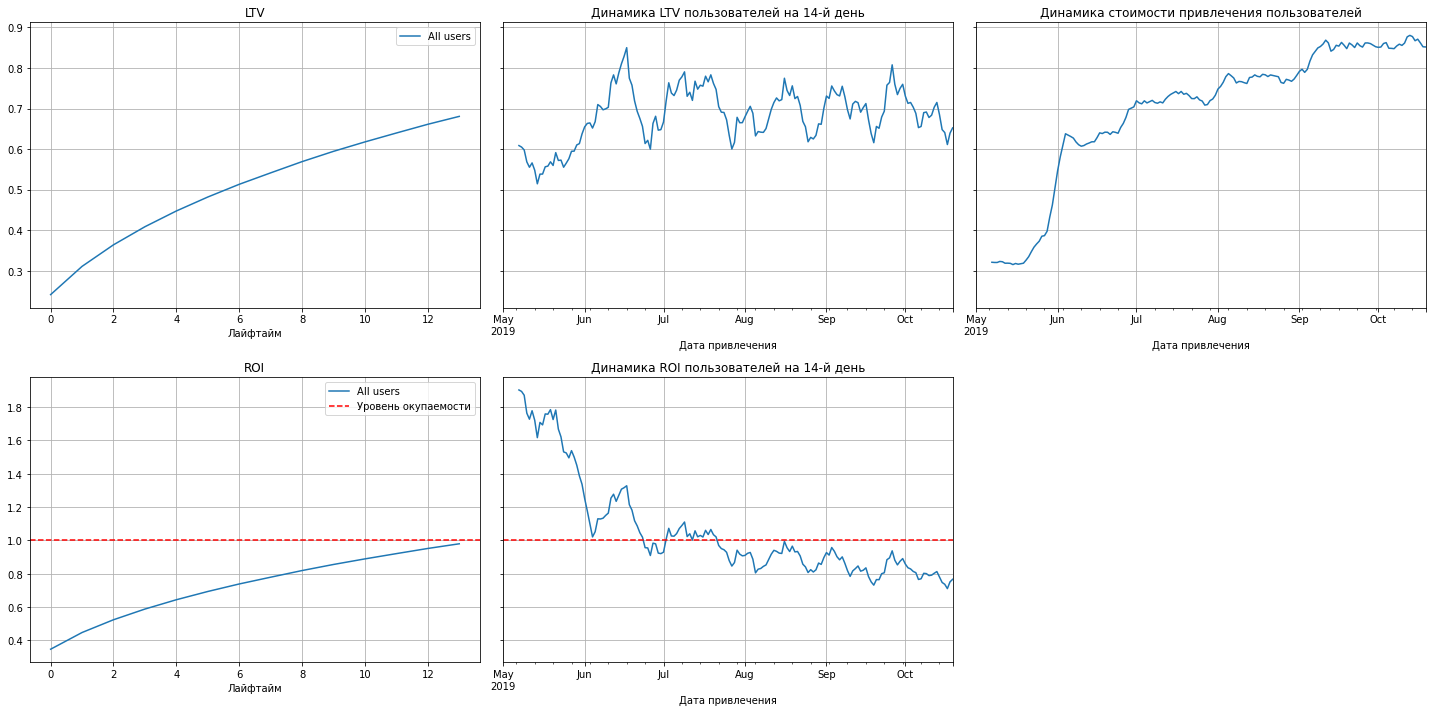

In [36]:
#Строим графики:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

Первое, что бросается в глаза - стремительный рост CAC с середины мая, и, как следствие "провальный" график ROI, то есть ракламная кампания не окупается. При этом видим, что LTV плавно растет, значит дело не в ухудшении качества пользователей.

Необходимо проанализировать также пользователей по всем параметрам - устройству, каналу привлечения, региону. Это будет сделано чуть ниже.   
Остается открытым вопрос о включении в рассмотрение органических пользователей. Для понимания, стоит ли оставлять органику в расчетах, перестроим графики ltv, roi и cac без органических пользователей:

In [37]:
#построение таблиц без учета органических пользователей
(ltv_raw_wo_o,
ltv_wo_o,
ltv_history_wo_o,
roi_wo_o,
roi_history_wo_o) = get_ltv(
    profiles.query('channel != "organic"'),
    orders,
    observation_date,
    horizon_days)

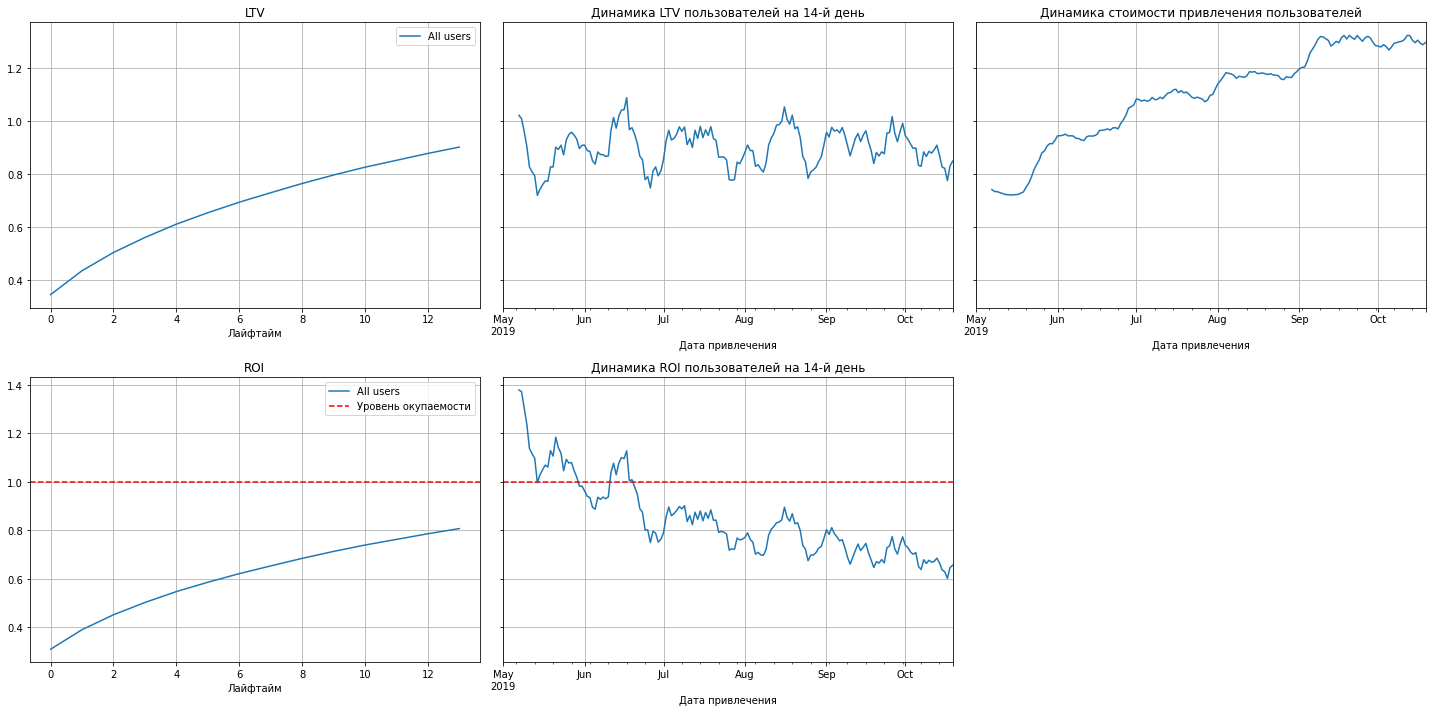

In [38]:
#построение графиков без органических пользователей
plot_ltv_roi(ltv_wo_o, ltv_history_wo_o, roi_wo_o, roi_history_wo_o, horizon_days)

Видны явные изменения - график ROI показывает еще больший разрыв с уровнем окупаемости (что понятно - ведь органические пользователи влияли на общий показатель), более сглаженным становится график CAC, но также виден рост стоимости привлечения пользователей. На графике динамики ROI видно, что в мае и середине июня некоторые пользователи выходили в окупаемость, а в начале июня был провал, что, вероятно, и повлияло на увеличение бюджета.

## Важный вывод:
Дальнейшие расчеты будут производиться **без учета органических пользователей**, чтобы точно определить причины неокупаемости рекламной кампании.

#### 2: Проверить конверсию пользователей и динамику её изменения. То же самое сделать с удержанием пользователей. Построить и изучить графики конверсии и удержания.

##### Проверка конверсии:

Для проверки корректности расчета конверсии, нужно обратить внимание на:  
    
- Сумма размеров когорт равна общему числу новых клиентов в изучаемый период.
- Кривая конверсии плавно растёт от нуля в направлении единицы.
- Кривая конверсии не снижается.
- В таблице конверсии нет значений, превышающих единицу.
- Количество новых покупателей равно числу новых клиентов, умноженному на общую конверсию.


In [39]:
#строим таблицы конверсии
(conversion_raw,
 conversion,
 conversion_history) = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days)

In [40]:
#проверяем корректность построения таблиц
display(conversion_raw.head(),
 conversion.head(), 
 conversion_history.head())

user_id            first_ts     channel   device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom      Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom   iPhone  United States   
2  22593348 2019-08-22 21:35:48  AdNonSense       PC        Germany   
3  31989216 2019-10-02 00:07:44     YRabbit   iPhone  United States   
4  46006712 2019-06-30 03:46:29  AdNonSense  Android         France   

          dt      month  payer  acquisition_cost            event_dt  \
0 2019-05-07 2019-05-01   True          1.088172 2019-05-07 20:59:09   
1 2019-07-09 2019-07-01  False          1.107237                 NaT   
2 2019-08-22 2019-08-01  False          0.988235                 NaT   
3 2019-10-02 2019-10-01  False          0.230769                 NaT   
4 2019-06-30 2019-06-01   True          1.008000 2019-06-30 03:46:52   

   lifetime     cohort  
0       0.0  All users  
1       NaN  All users  
2       NaN  All users  
3       NaN  All users  
4       0.0  All users

cohort_size       0.0       1.0       2.0       3.0     4.0  \
cohort                                                                   
All users        88644  0.058752  0.066321  0.069999  0.072571  0.0745   

                5.0       6.0       7.0       8.0       9.0      10.0  \
cohort                                                                  
All users  0.075775  0.076745  0.077591  0.078291  0.078945  0.079362   

               11.0      12.0      13.0  
cohort                                   
All users  0.079678  0.079904  0.080197

cohort_size       0.0       1.0       2.0       3.0       4.0  \
dt                                                                          
2019-05-01          390  0.058974  0.066667  0.071795  0.071795  0.076923   
2019-05-02          323  0.058824  0.068111  0.068111  0.068111  0.068111   
2019-05-03          346  0.057803  0.069364  0.075145  0.078035  0.083815   
2019-05-04          457  0.070022  0.074398  0.076586  0.078775  0.085339   
2019-05-05          438  0.036530  0.043379  0.047945  0.052511  0.052511   

                 5.0       6.0       7.0       8.0       9.0      10.0  \
dt                                                                       
2019-05-01  0.076923  0.076923  0.079487  0.082051  0.082051  0.082051   
2019-05-02  0.068111  0.068111  0.068111  0.068111  0.068111  0.071207   
2019-05-03  0.083815  0.083815  0.083815  0.083815  0.083815  0.083815   
2019-05-04  0.085339  0.087527  0.089716  0.089716  0.091904  0.091904   
2019-05-05  0.052511  0.052511  0.052511  0.052511  0.052511  0.052511   

                11.0      12.0      13.0  
dt                                        
2019-05-01  0.082051  0.082051  0.082051  
2019-05-02  0.071207  0.071207  0.071207  
2019-05-03  0.083815  0.083815  0.086705  
2019-05-04  0.091904  0.091904  0.091904  
2019-05-05  0.052511  0.052511  0.052511

In [41]:
#проверяем, совпадает ли заданный изучаемый период с тем, что получилось в таблицах
last_acquisition_date = observation_date - timedelta(days=horizon_days-1)
print(last_acquisition_date)
print(conversion_history.index.max())

2019-10-19
2019-10-19 00:00:00


In [42]:
#рассчитываем для сравнения число новых покупателей с лайфтаймом 14 дней

report = orders.merge(
    profiles.query(
        'dt <= @last_acquisition_date and channel != "organic"'
    ),
    on='user_id',
)
# рассчитываем лайфтайм для каждой покупки
report['lifetime'] = (report['event_dt'] - report['first_ts']).dt.days
# исключаем лишние лайфтаймы
report = report.query('lifetime <= 13')

In [43]:
#проверяем правильность расчета конверсии
if conversion['cohort_size'][0] != \
profiles.query('dt <= @last_acquisition_date and channel != "organic"').agg({'user_id':'nunique'})[0]:
    print('Сумма размеров когорт НЕ равна общему числу новых клиентов в изучаемый период')
elif round((conversion.iloc[:,14]*conversion['cohort_size'])[0]) != \
report.agg({'user_id':'nunique'})[0]:
    print('Количество новых покупателей НЕ равно числу новых клиентов, умноженному на общую конверсию')
elif sum([True if conv >= 1 else False for conv in conversion.iloc[0,1:15]]) != 0:
    print('В таблице конверсии ЕСТЬ значения, превышающие единицу')
else:
    print('Расчет конверсии произведен корректно')

Расчет конверсии произведен корректно


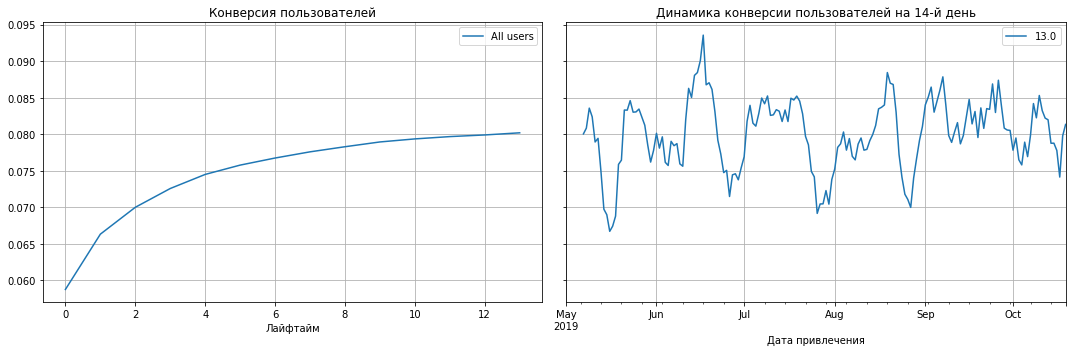

In [44]:
#строим графики конверсии и динамики конверсии на 14й день
plot_conversion(conversion, conversion_history, horizon_days)

Конверсия медленно растет, а динамика конверсии стала выше как раз с момента увеличения рекламного бюджета и падения окупаемости рекламной кампании.  
Видимо, именно на факт лучшей динамики конверсии и опирались маркетологи при "раздувании" бюджета.

##### Проверка удержания:

Для проверки корректности расчета удержания, нужно обратить внимание на:
- Сумма размеров когорт равна числу новых клиентов в изучаемый период.
- Сумма размеров платящих когорт равна числу покупателей в изучаемый период.
- Удержание убывает по экспоненциальному закону.
- Удержание неплатящих убывает быстрее, чем удержание платящих.


In [45]:
#строим таблицы удержания
(retention_raw,
 retention, 
 retention_history) = get_retention(
    profiles, 
    visits, 
    observation_date, 
    horizon_days)

In [46]:
#проверяем корректность построения таблиц
display(retention_raw.head(),
 retention.head(), 
 retention_history.head())

user_id            first_ts   channel  device         region         dt  \
0   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States 2019-05-07   
1   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States 2019-05-07   
2   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States 2019-05-07   
3  4919697 2019-07-09 12:46:07  FaceBoom  iPhone  United States 2019-07-09   
4  4919697 2019-07-09 12:46:07  FaceBoom  iPhone  United States 2019-07-09   

       month  payer  acquisition_cost       session_start  lifetime  
0 2019-05-01   True          1.088172 2019-05-07 20:58:57         0  
1 2019-05-01   True          1.088172 2019-05-08 06:00:42         0  
2 2019-05-01   True          1.088172 2019-05-09 07:33:16         1  
3 2019-07-01  False          1.107237 2019-07-09 12:46:07         0  
4 2019-07-01  False          1.107237 2019-07-10 22:27:24         1

cohort_size    0         1         2         3         4         5  \
payer                                                                       
False        81334  1.0  0.176876  0.086594  0.051823  0.033504  0.024701   
True          7310  1.0  0.380985  0.293023  0.235568  0.210260  0.191245   

              6         7         8         9        10        11        12  \
payer                                                                         
False  0.018651  0.014188  0.011729  0.009541  0.007488  0.006393  0.006012   
True   0.166758  0.156908  0.145144  0.136389  0.135021  0.121888  0.118741   

             13  
payer            
False  0.004709  
True   0.104925

cohort_size    0         1         2         3         4  \
payer dt                                                                     
False 2019-05-01          358  1.0  0.212291  0.072626  0.061453  0.022346   
      2019-05-02          300  1.0  0.196667  0.103333  0.033333  0.030000   
      2019-05-03          315  1.0  0.180952  0.076190  0.066667  0.028571   
      2019-05-04          413  1.0  0.164649  0.101695  0.058111  0.024213   
      2019-05-05          412  1.0  0.191748  0.092233  0.065534  0.033981   

                         5         6         7         8         9        10  \
payer dt                                                                       
False 2019-05-01  0.011173  0.025140  0.011173  0.013966  0.008380  0.000000   
      2019-05-02  0.016667  0.023333  0.010000  0.006667  0.006667  0.010000   
      2019-05-03  0.028571  0.031746  0.015873  0.009524  0.003175  0.006349   
      2019-05-04  0.021792  0.014528  0.007264  0.021792  0.009685  0.012107   
      2019-05-05  0.021845  0.014563  0.019417  0.009709  0.000000  0.007282   

                        11        12        13  
payer dt                                        
False 2019-05-01  0.011173  0.002793  0.013966  
      2019-05-02  0.010000  0.016667  0.003333  
      2019-05-03  0.003175  0.006349  0.003175  
      2019-05-04  0.016949  0.002421  0.007264  
      2019-05-05  0.009709  0.012136  0.002427

In [47]:
#проверяем правильность расчета удержания
if retention['cohort_size'].sum() != \
profiles.query('dt <= @last_acquisition_date and channel != "organic"').agg({'user_id':'nunique'})[0]:
    print('Сумма размеров когорт НЕ равна общему числу новых клиентов в изучаемый период')
elif retention.query('payer == 1')['cohort_size'][1] != \
profiles.query('dt <= @last_acquisition_date and channel != "organic"').agg({'payer':'sum'})[0]:
    print('Сумма размеров платящих когорт НЕ равна числу покупателей в изучаемый период')
else:
    print('Расчет удержания произведен корректно')

Расчет удержания произведен корректно


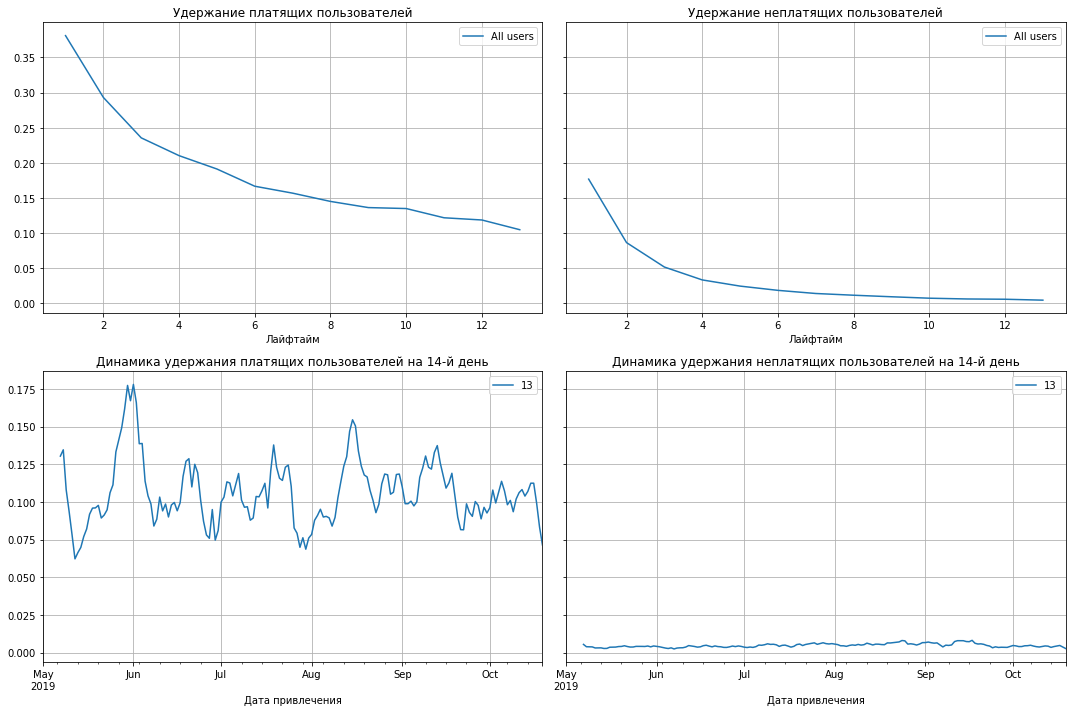

In [48]:
#строим графики удержания и динамики удержания на 14й день
plot_retention(retention, retention_history, horizon_days)

Удержание платящих пользователей действительно убывает медленнее, чем неплатящих, и оба графика подчиняются экспоненциальному закону.
Значит удержание действительно посчитано верно.  
На графике динамики удержания виден небольшой всплеск в уже знакомый период конца мая, а далее колебания становятся немного ниже.  
Для полного понимания ситуации, следует оценить все параметры в разбивке по регионам, устройствам и каналам привлечения.

## Предварительный вывод:
- рекламная кампания в целом не окупается, причем практически на всем рассматриваемом временном отрезке.
- растет бюджет рекламной компании, то есть при общей неокупаемости, компания продолжает расширять вложения в рекламу, что стратегически неверно
- конверсия и удержание имеют ожидаемый рост и убывание, соответственно стоит детальнее рассмотреть параметры в разрезе стран, устройств и каналов привлечения.

#### 3: Проанализировать окупаемость рекламы с разбивкой по устройствам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [49]:
#построение таблиц с разбивкой по устройствам
(ltv_raw_device,
ltv_device,
ltv_history_device,
roi_device,
roi_history_device) = get_ltv(
    profiles.query('channel != "organic"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'])

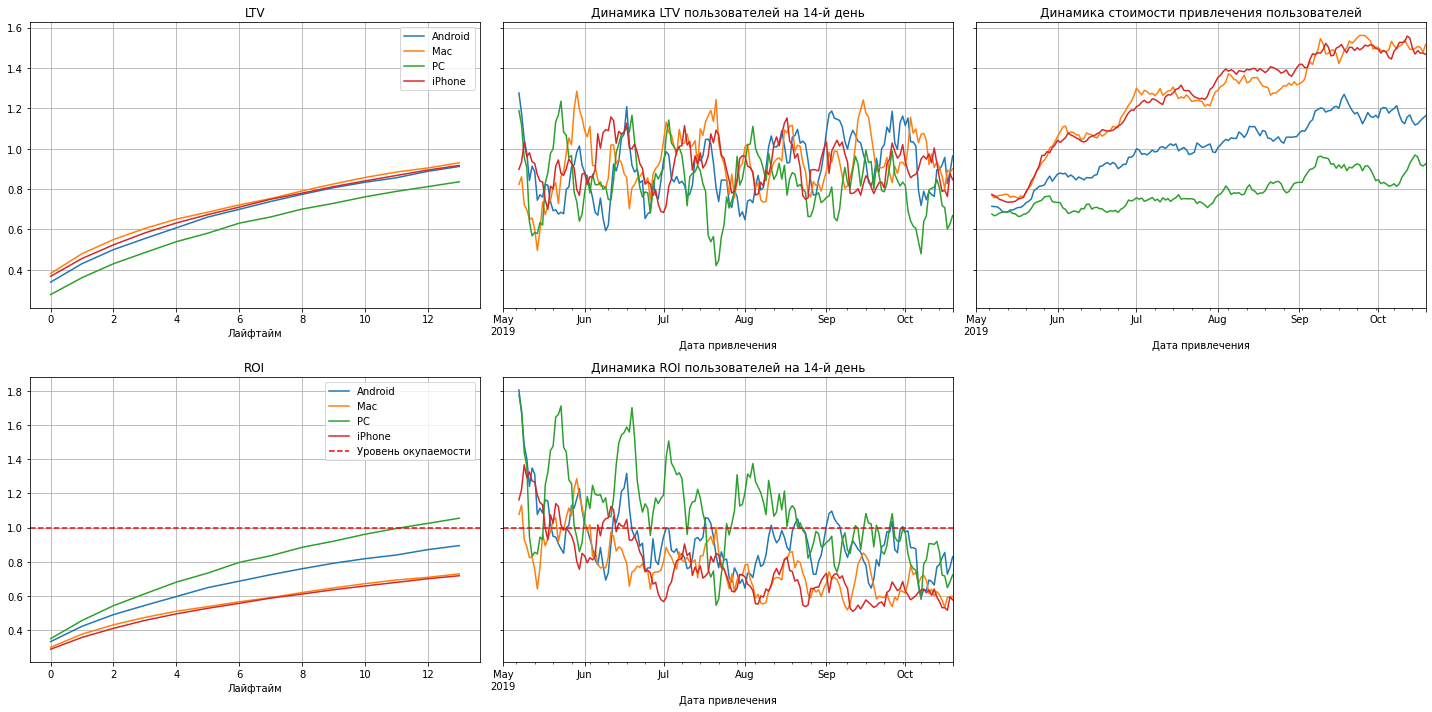

In [50]:
#строим графики
plot_ltv_roi(ltv_device, ltv_history_device, roi_device, roi_history_device, horizon_days)

На графиках заметно, что ярких "разрывов" в показателях у различных устройств нет. Немного хуже покупают пользователи ПК, но при этом за счет яркой динамики ROI до конца июля, в ощем показатели окупаемости, именно пользователи ПК окупаются к концу рассматриваемого горизонта.

In [51]:
#строим удержание в разрезе девайсов
(retention_raw_device,
 retention_device, 
 retention_history_device) = get_retention(
    profiles, 
    visits, 
    observation_date, 
    horizon_days,
    dimensions=['device'])

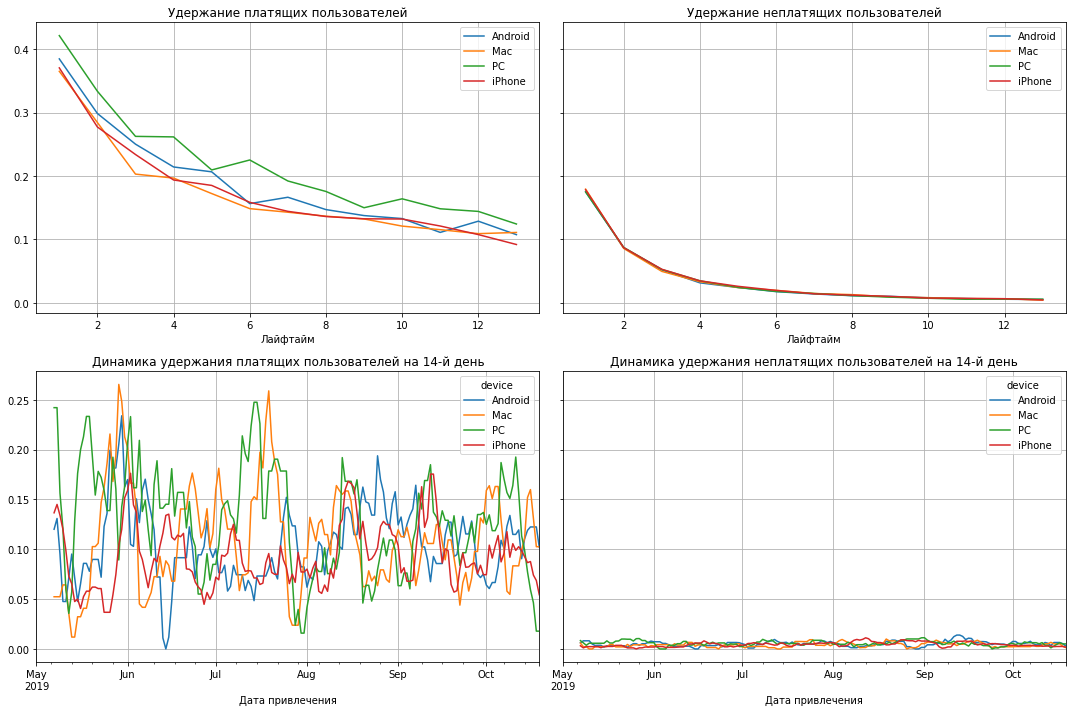

In [52]:
plot_retention(
 retention_device, 
 retention_history_device,
 horizon_days);

На графиках удержания видим равенство между устройствами. Соответственно проблем с приложением у пользователей нет.

In [53]:
#строим конверсию по устройствам
(conversion_raw_device,
 conversion_device,
 conversion_history_device) = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'])

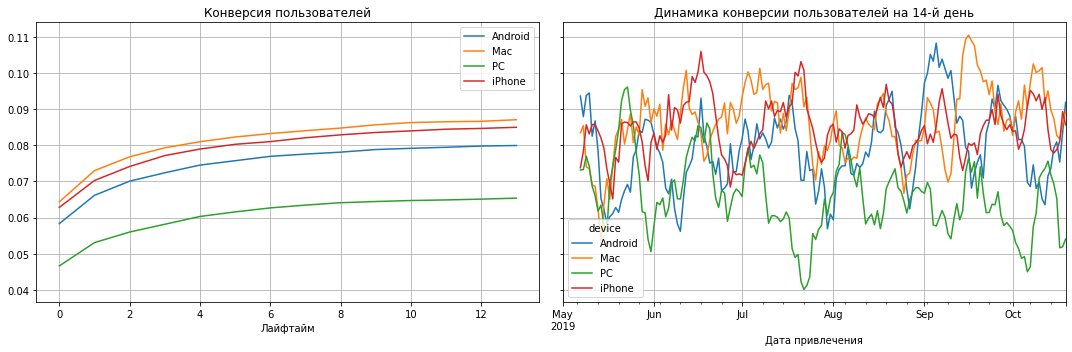

In [54]:
plot_conversion(
 conversion_device,
 conversion_history_device,
 horizon_days);

Намного более низкая конверсия у пользователей ПК. Вероятнее всего потому, что развлекательное приложение чаще ставят именно на мобильные и портативные устройства (телефоны и ноутбуки), а у домашних ПК пользователи в принципе бывают реже.

### Предварительный вывод:
Причины неуспешности рекламной кампании кроется не в сбоях в работе приложения на каком-то из устройств.  
Стоит искать причины дальше.

#### 4: Проанализировать окупаемость рекламы с разбивкой по странам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [55]:
#построение таблиц с разрезом по странам
(ltv_raw_region,
ltv_region,
ltv_history_region,
roi_region,
roi_history_region) = get_ltv(
    profiles.query('channel != "organic"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'])

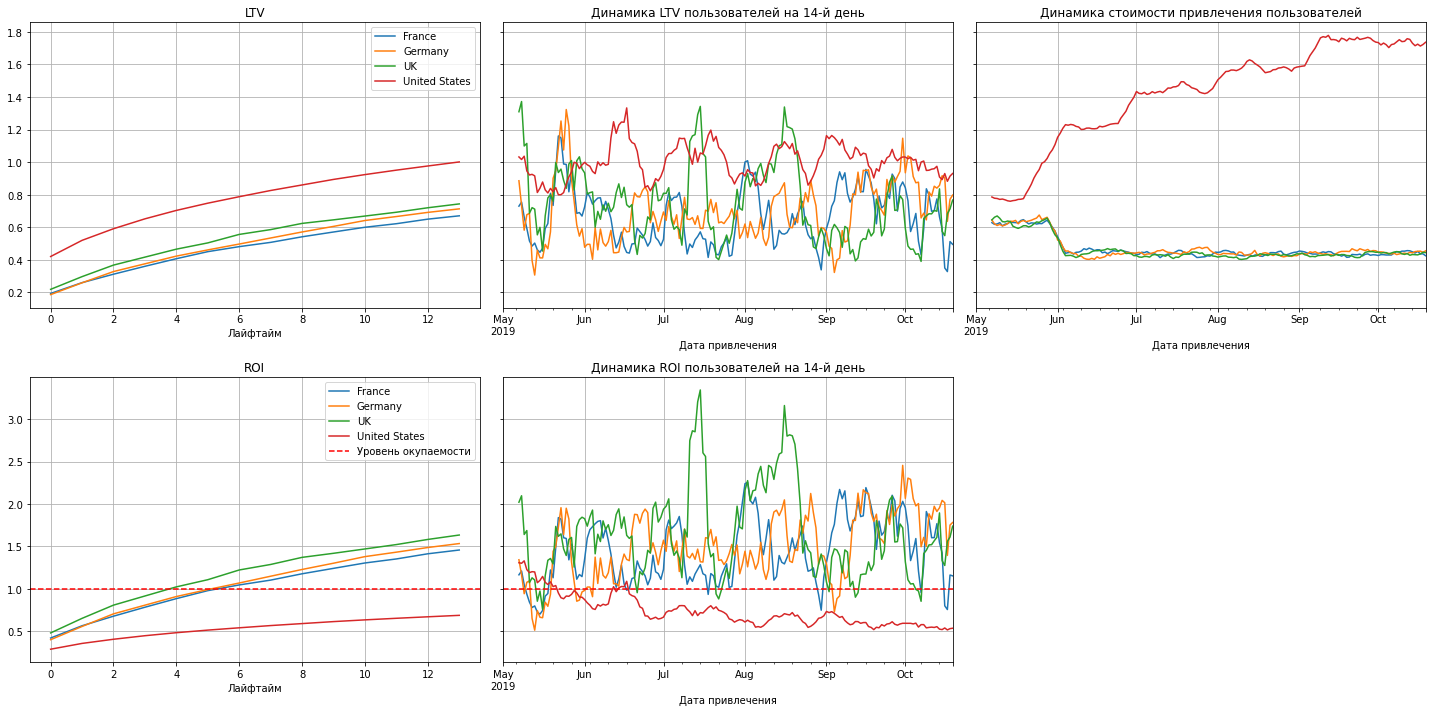

In [56]:
plot_ltv_roi(ltv_region, ltv_history_region, roi_region, roi_history_region, horizon_days)

Ярко видно, что пользователи из США не окупаются, а вот пользователи из европейских стран преодолевают уровень окупаемости в среднем за неделю.  
При этом LTV для пользователей из США выше, значит покупки происходят, причем в хорошем объеме.
Также видим, что рекламный бюджет для США колоссально растет на всем рассматриваемом периоде, а вот бюджет для европейских стран имел снижение в конце мая, и далее равномерен.  
Соотвественно недостижение уровня окупаемости связано с огромным рекламным бюджетом, и стоит корректировать именно нюансы рекламных кампаний по проблемным каналам.
С учетом того, что пользователи из США - основной контингент пользователей приложения, становится ясно, почему общие графики показывают удручающие результаты.  
Однозначно необходимо рассмотреть параметры отдельно для пользователей из США и других стран.

In [57]:
#строим удержание в разрезе по регионам
(retention_raw_region,
 retention_region, 
 retention_history_region) = get_retention(
    profiles, 
    visits, 
    observation_date, 
    horizon_days,
    dimensions=['region'])

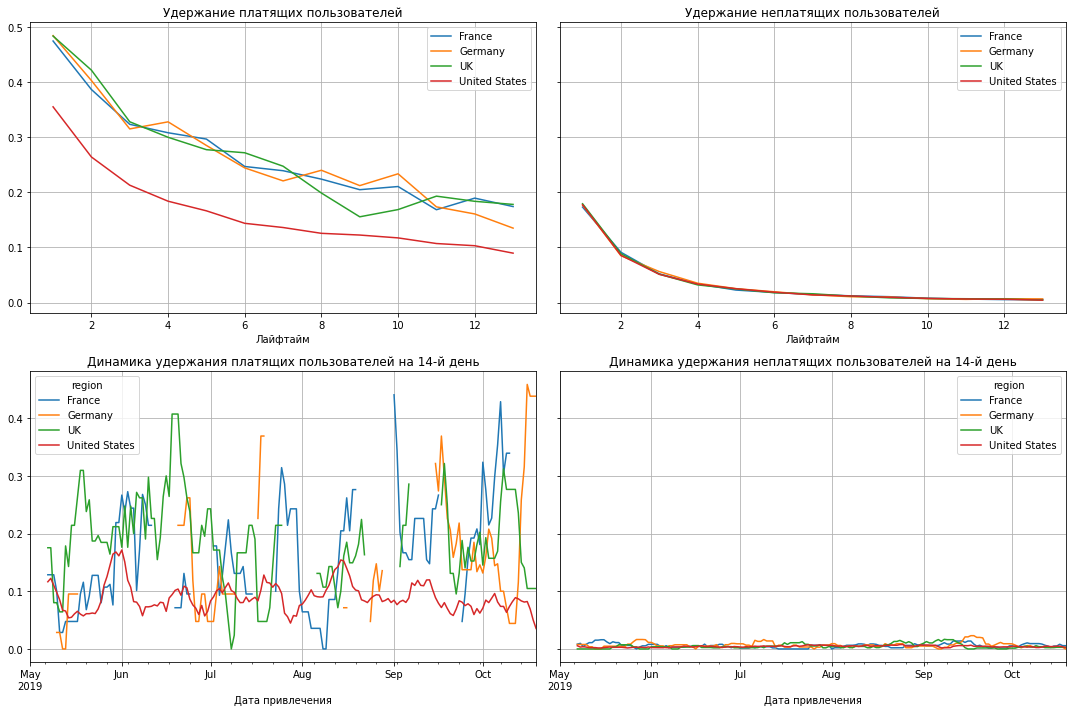

In [58]:
plot_retention(
 retention_region, 
 retention_history_region,
 horizon_days)

Удержание платящих пользователей из США ниже других стран. Стоит зафиксировать это и проанализировать далее, разобрав отдельно пользователей США.

In [59]:
#строим конверсию в разрезе по регионам
(conversion_raw_region,
 conversion_region,
 conversion_history_region) = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'])

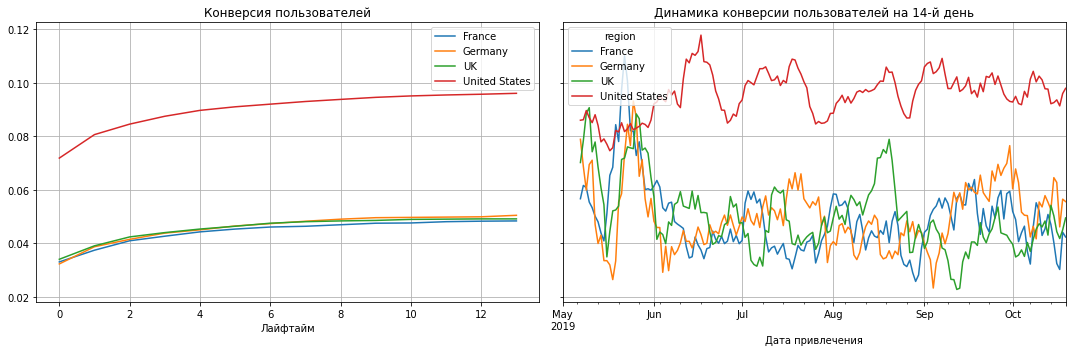

In [60]:
plot_conversion(
 conversion_region,
 conversion_history_region,
 horizon_days);

В сравнении с другими странами, пользователи из США конвертируются много лучше. Отлично конвертируются, но плохо удерживаются. Возможно, причина в несоответствии рекламных слоганов и реального предложения клиенту?

### Предварительный вывод:
Пользователи из США отлично конвертируются и плохо удержиавются, стоит найти причины.  
Невероятный рост стоимости рекламы привел к невозможности окупить полученных пользователей из США.

#### 5: Проанализировать окупаемость рекламы с разбивкой по рекламным каналам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [61]:
#построение таблиц в разрезе по каналам
(ltv_raw_channel,
ltv_channel,
ltv_history_channel,
roi_channel,
roi_history_channel) = get_ltv(
    profiles.query('channel != "organic"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'])

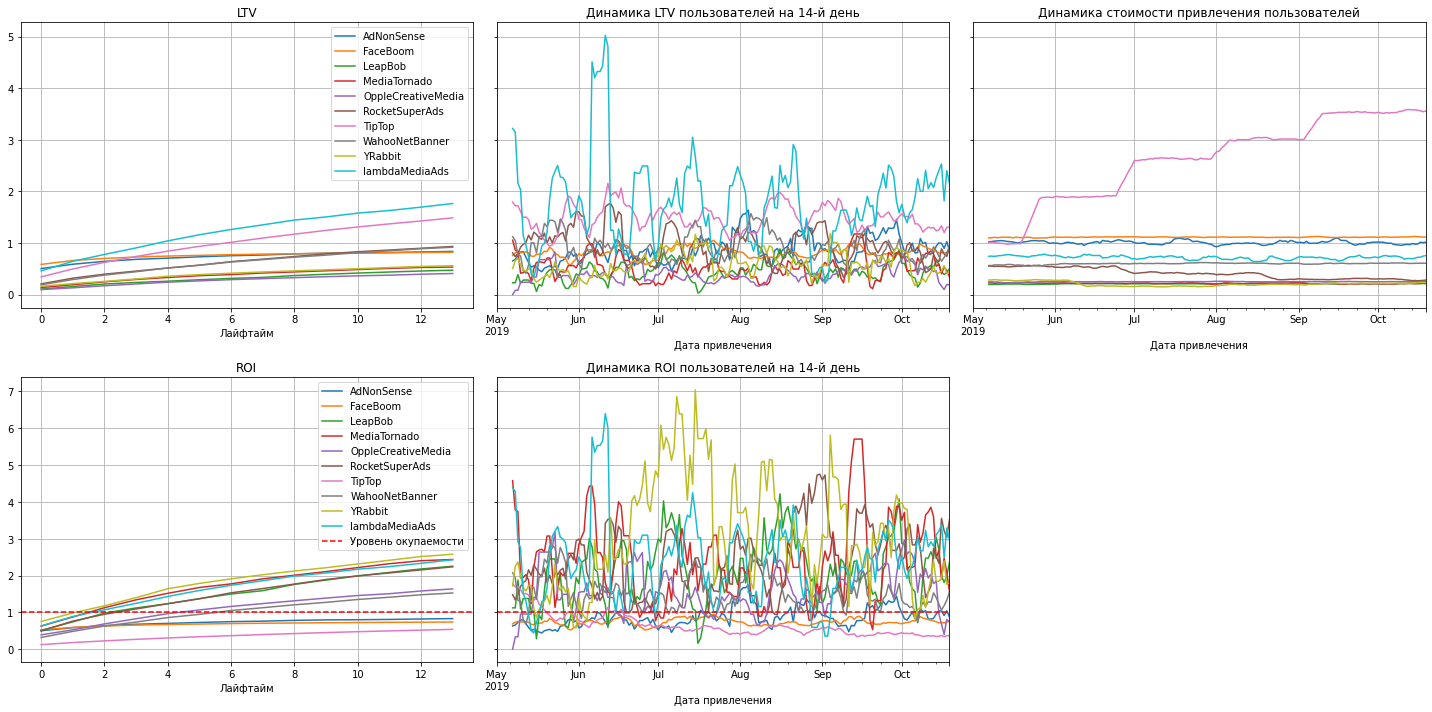

In [62]:
plot_ltv_roi(ltv_channel, ltv_history_channel, roi_channel, roi_history_channel, horizon_days)

На графике САС заметен рост стоимости по каналу TipTop, он-то и "раздувает" бюджет во времени. Остальные каналы имеют более ровные показатели.
При этом, окупаемости так и не достигли TipTop, FaceBoom и AdNonSense.  
Напомню, что ранее было выявлено, что TipTop, FaceBoom и AdNonSense входят в топ-5 каналов с лучшим процентом конвертации из пользователя в покупателя. Возможная причина в высоком бюджете для этих каналов рекламы.

Стоит оценить удержание и конверсию пользователей.

In [63]:
#строим удержание с разбивкой по каналам
(retention_raw_channel,
 retention_channel, 
 retention_history_channel) = get_retention(
    profiles, 
    visits, 
    observation_date, 
    horizon_days,
    dimensions=['channel'])

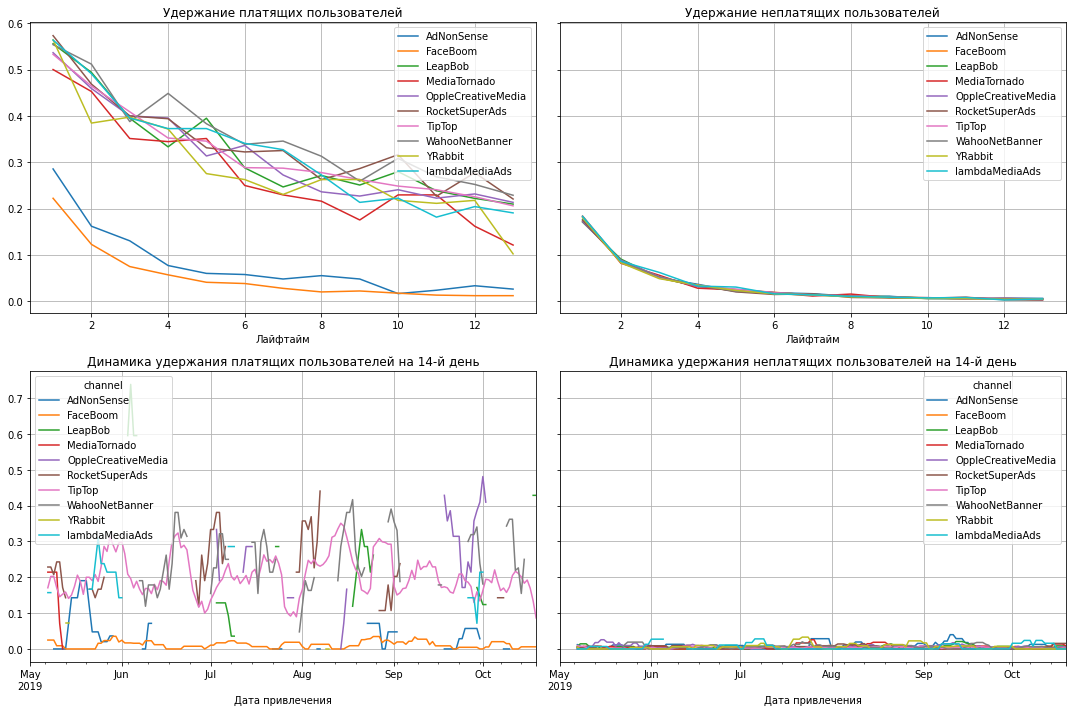

In [64]:
plot_retention(
 retention_channel,
 retention_history_channel,
 horizon_days);

Ярко выраженное низкое удержание пользователей, пришедших через FaceBoom и AdNonSense. При это пользователи из TipTop удерживаются наравне с остальными каналами.  
Скорее всего построение рекламной кампании именно по FaceBoom и AdNonSense некорректное, поэтому пользователи "уходят".

In [65]:
#проверим конверсию
(conversion_raw_channel,
 conversion_channel,
 conversion_history_channel) = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'])

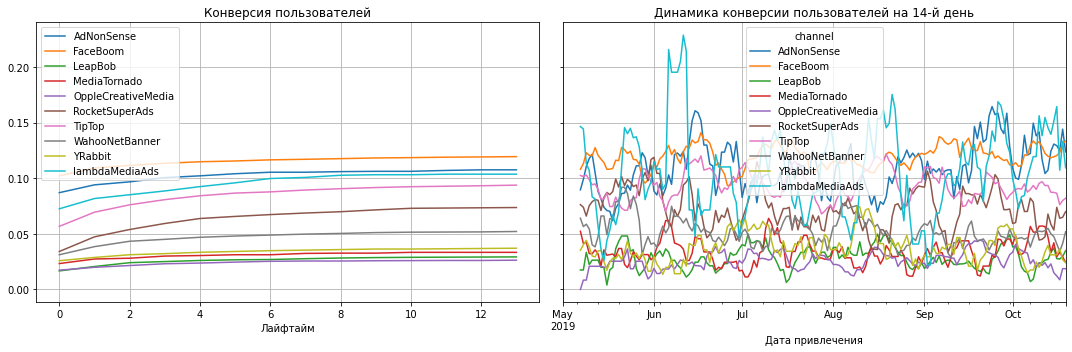

In [66]:
plot_conversion(
 conversion_channel,
 conversion_history_channel,
 horizon_days);

Конверсия по плохо-удерживающим каналам наиболее высокая. Похожая ситуация была и с пользователями из США.

### Предварительные выводы:
- также, как и в разбивке по регионам, разбивка по каналам привлечения показала, что есть каналы FaceBoom и AdNonSense, которые хорошо конвертируют, но плохо удерживают пользователей.
- из-за хорошей конвертации, бюджет на эти каналы бОльший, чем на некоторые другие, поэтому общая окупаемость ниже единицы.
- канал TipTop при общем хорошем показателе удержания и конверсии имеет раздутый рекламный бюджет, поэтому пользователи, привлеченные через этот канал также не окупаются.
- возможно, причина общей неокупаемости кроется именно в рекламном бюджете на канал TipTop, но стоит рассмотреть все же показатели отдельно по разным регионам

### Отдельно рассмотрим пользователей США в разрезе по каналам привлечения

In [67]:
#строим ltv, roi и cac по каналам:
(ltv_raw_us_channel,
ltv_us_channel,
ltv_history_us_channel,
roi_us_channel,
roi_history_us_channel) = get_ltv(
    profiles.query('channel != "organic" and region == "United States"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'])

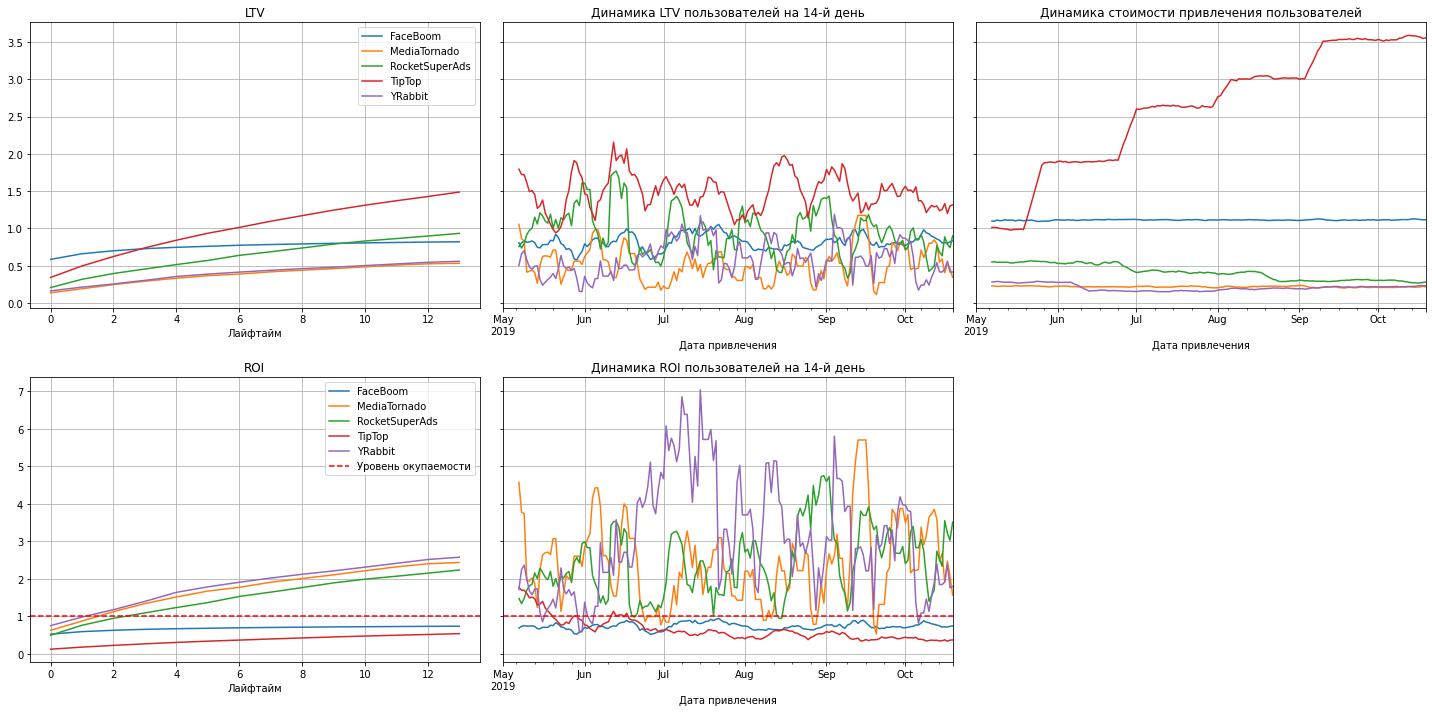

In [68]:
plot_ltv_roi(ltv_us_channel, ltv_history_us_channel, roi_us_channel, roi_history_us_channel, horizon_days)

Прекрасно видно, что для пользователей из США TipTop - основной канал привлечения. У него максимальный LTV с активным ростом. Но из-за растущего графика CAC окупаемость не достигнута.  
Немного иная ситуация с FaceBoom - LTV более "ровный", то есть покупатели менее активно совершают повторные покупки. При этом стоимость клиента по этому каналу стабильно на одном, но высоком уровне.

In [69]:
#проверяем удержание по каналам
(retention_raw_us_channel,
 retention_us_channel, 
 retention_history_us_channel) = get_retention(
    profiles.query('region == "United States"'), 
    visits, 
    observation_date, 
    horizon_days,
    dimensions=['channel'])

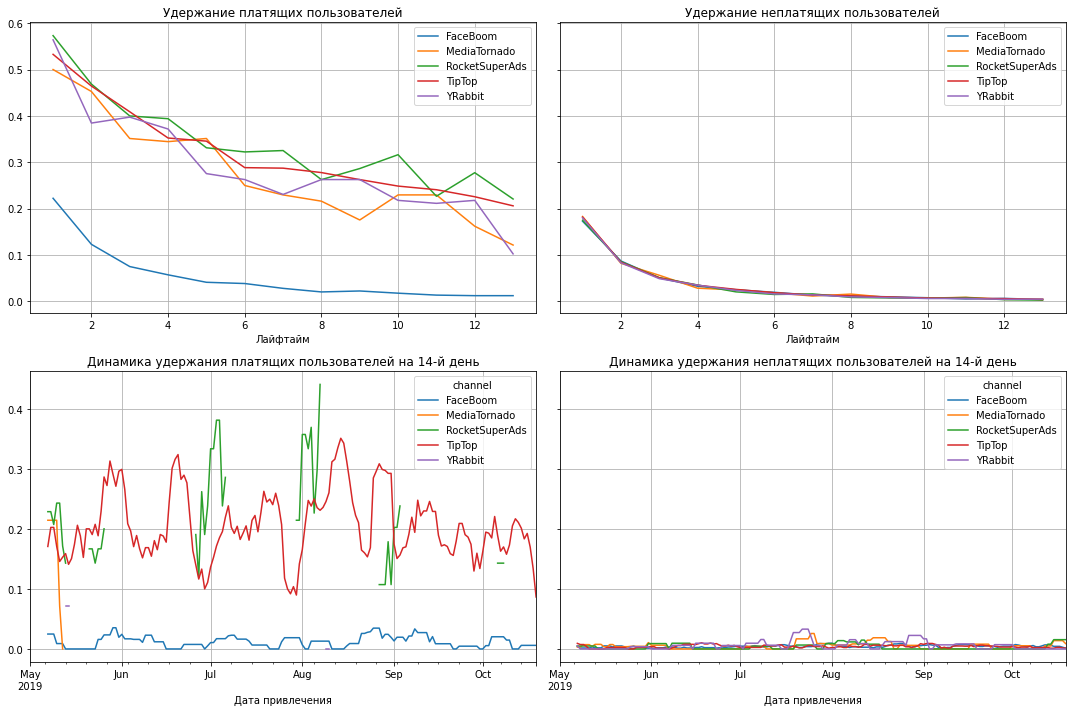

In [70]:
plot_retention(
 retention_us_channel,
 retention_history_us_channel,
 horizon_days);

Найдена причина такого плохого LTV для пользователей из FaceBoom - плохое удержание. Причем надо обратить внимание, что удержание платящих пользователей и неплатящих - имеют одинаковое убывание. Стоит оценить, почему после перехода в приложение, пользователи из FaceBoom практически не совершают повторных покупок. Возможно, это некорректное рекламное предложение?  

Пользователи, перешедшие из TipTop удерживаются на уровне с другими каналами привлечения.

In [71]:
#проверяем конверсию
(conversion_raw_us_channel,
 conversion_us_channel,
 conversion_history_us_channel) = get_conversion(
    profiles.query('region == "United States"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'])

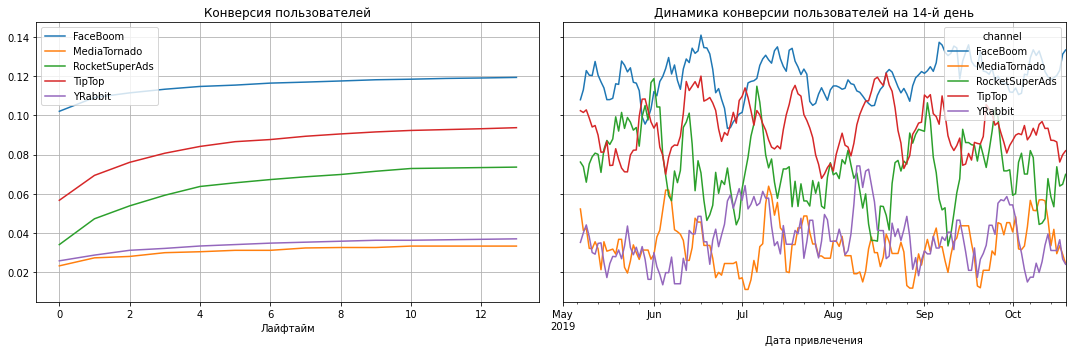

In [72]:
plot_conversion(
 conversion_us_channel,
 conversion_history_us_channel,
 horizon_days);

Конверсия по FaceBoom выше, чем по остальным каналам. Пользователи хорошо конвертируются. Но, видимо, один раз.

### Предварительный вывод:
- Необходимо детально проанализировать рекламное предложение, распространяемое через FaceBoom. Оно привлекает клиента однократно, но не позволяет удерживать долго.  
- Необходимо перестать увеличивать бюджет на канал TipTop. Стоит распределить бюджет между другими успешными каналами для пользователей США - например, RocketSuperAds с хорошим удержанием и конверсией.

### Отдельно рассмотрим пользователей Европы в разрезе по каналам привлечения

In [73]:
#строиим ltv, roi и cac по каналам:
(ltv_raw_eu_channel,
ltv_eu_channel,
ltv_history_eu_channel,
roi_eu_channel,
roi_history_eu_channel) = get_ltv(
    profiles.query('channel != "organic" and region != "United States"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'])

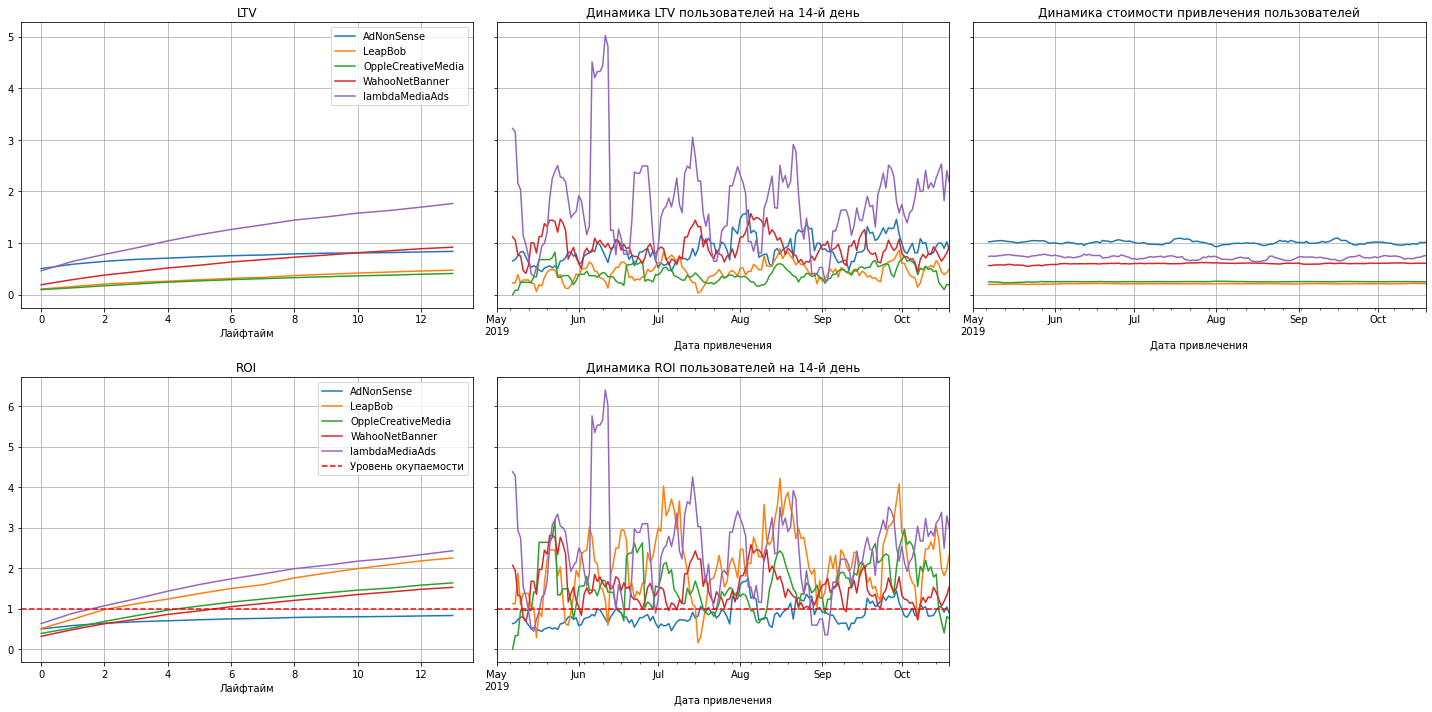

In [74]:
plot_ltv_roi(ltv_eu_channel, ltv_history_eu_channel, roi_eu_channel, roi_history_eu_channel, horizon_days)

Единственный неокупающийся канал привлечения в Европе - AdNonSense, который также себя проявил на общих графиках.  
При этом видно, что LTV пользователей этого канала на равне с другими, но более "сглаженное", значит опять же увидим плохое удержание.  
Также обратим внимание на самую высокую стоимость пользователя по этому каналу. Значит одна из причин неокупаемости - высокий бюджет для канала.

In [75]:
#проверяем удержание
(retention_raw_eu_channel,
 retention_eu_channel, 
 retention_history_eu_channel) = get_retention(
    profiles.query('region != "United States"'), 
    visits, 
    observation_date, 
    horizon_days,
    dimensions=['channel'])

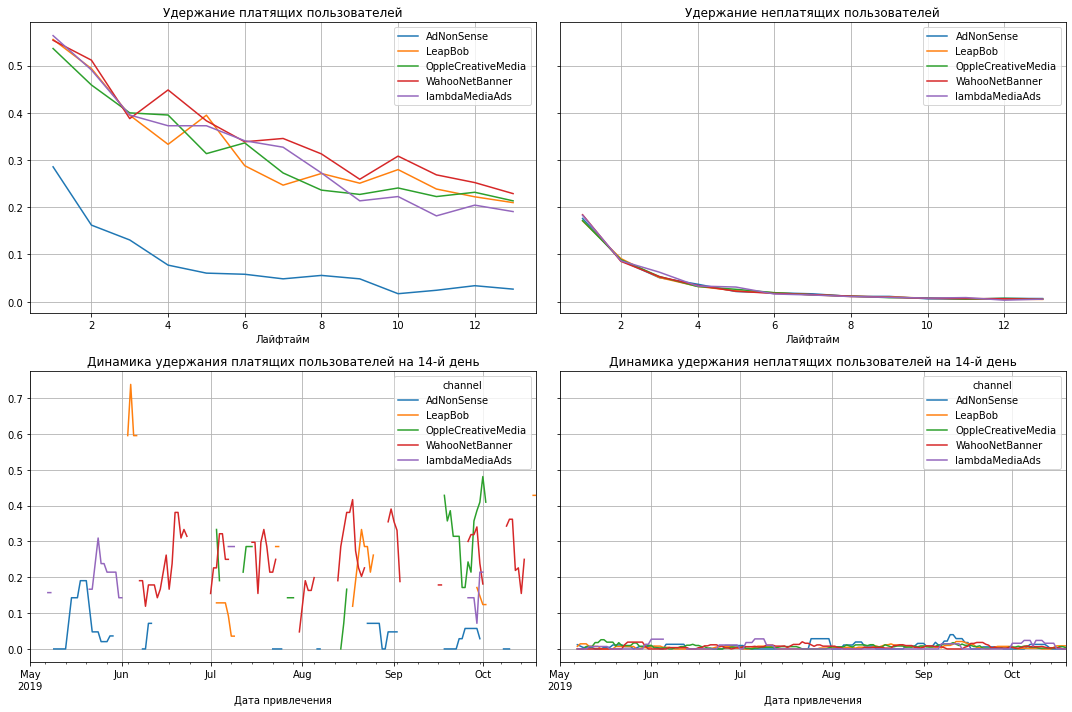

In [76]:
plot_retention(
 retention_eu_channel,
 retention_history_eu_channel,
 horizon_days);

Предположение утвердилось - удержание пользователей из AdNonSense значительно ниже, чем пользователей из других каналов. Это похожая ситуация с пользователями FaceBoom из США. Поэтому рекомендация схожая - проанализировать содержание рекламной кампании по этому каналу привлечения.

In [77]:
#проверяем конверсию
(conversion_raw_eu_channel,
 conversion_eu_channel,
 conversion_history_eu_channel) = get_conversion(
    profiles.query('region != "United States"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'])

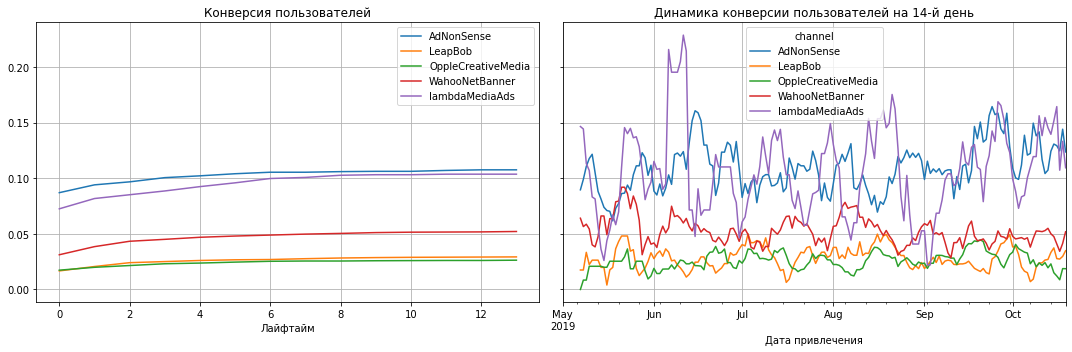

In [78]:
plot_conversion(
 conversion_eu_channel,
 conversion_history_eu_channel,
 horizon_days);

### Предварительный вывод:
- стоит пересмотреть рекламное предложение, растространяемое через канал AdNonSense, так как происходит хорошая конвертация, но плохое удержание пользователей.
- стоит часть рекламного бюджета на канал AdNonSense направить на перспективный источник пользователей - lambdaMediaADS, так как пользователи этого канала хорошо конвертируются и удерживаются.

### Отдельно рассмотрим пользователей США в разрезе по устройствам

In [79]:
#строим ltv, roi, cac в разрезе устройств
(ltv_raw_us_device,
ltv_us_device,
ltv_history_us_device,
roi_us_device,
roi_history_us_device) = get_ltv(
    profiles.query('channel != "organic" and region == "United States"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'])

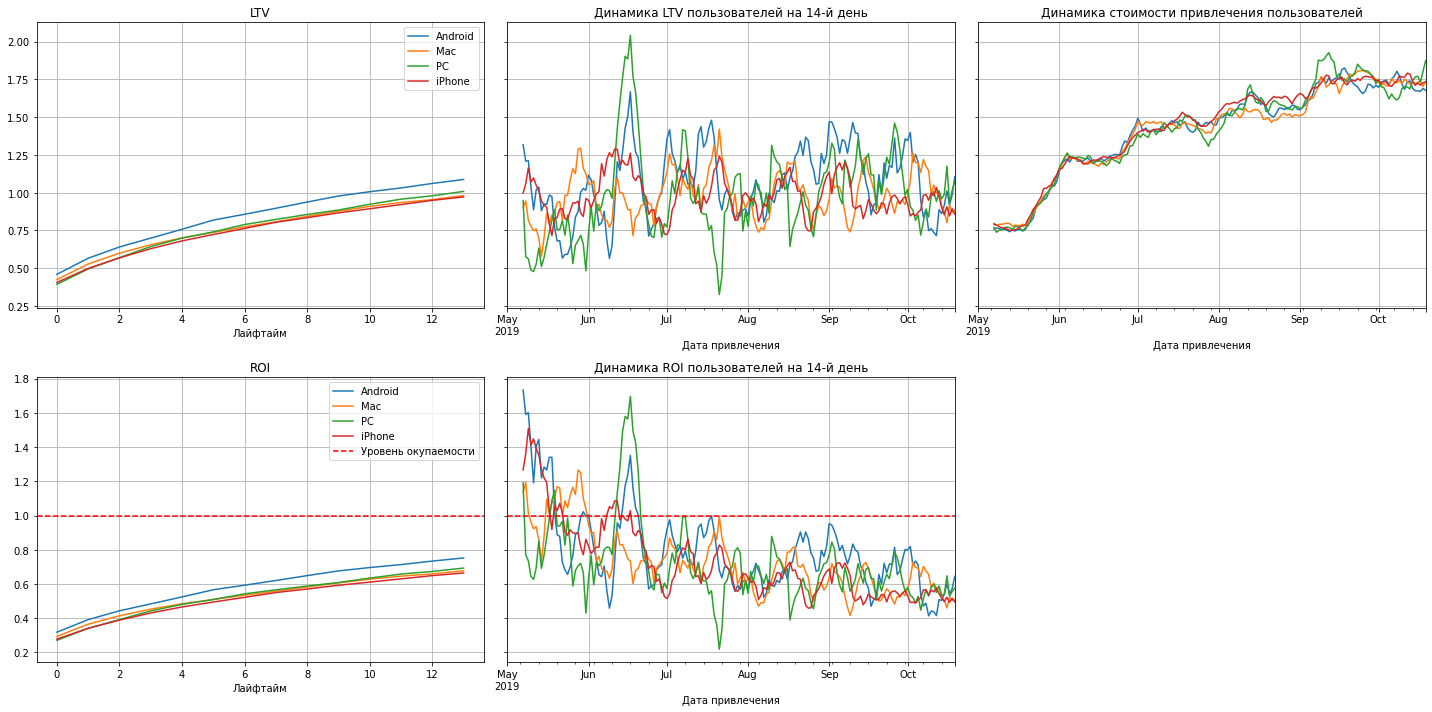

In [80]:
plot_ltv_roi(ltv_us_device,
ltv_history_us_device,
roi_us_device,
roi_history_us_device, horizon_days)

Никаких выбивающихся значений, и общая неокпаемость, говорят о том, что на ход рекламной компании не влияет работа различных устройств. Общая неокупаемость обусловлена каналами привлечения, что выявлено выше.

In [81]:
#строим удержание в разрезе по девайсам
(retention_raw_us_device,
 retention_us_device, 
 retention_history_us_device) = get_retention(
    profiles.query('region == "United States"'), 
    visits, 
    observation_date, 
    horizon_days,
    dimensions=['device'])

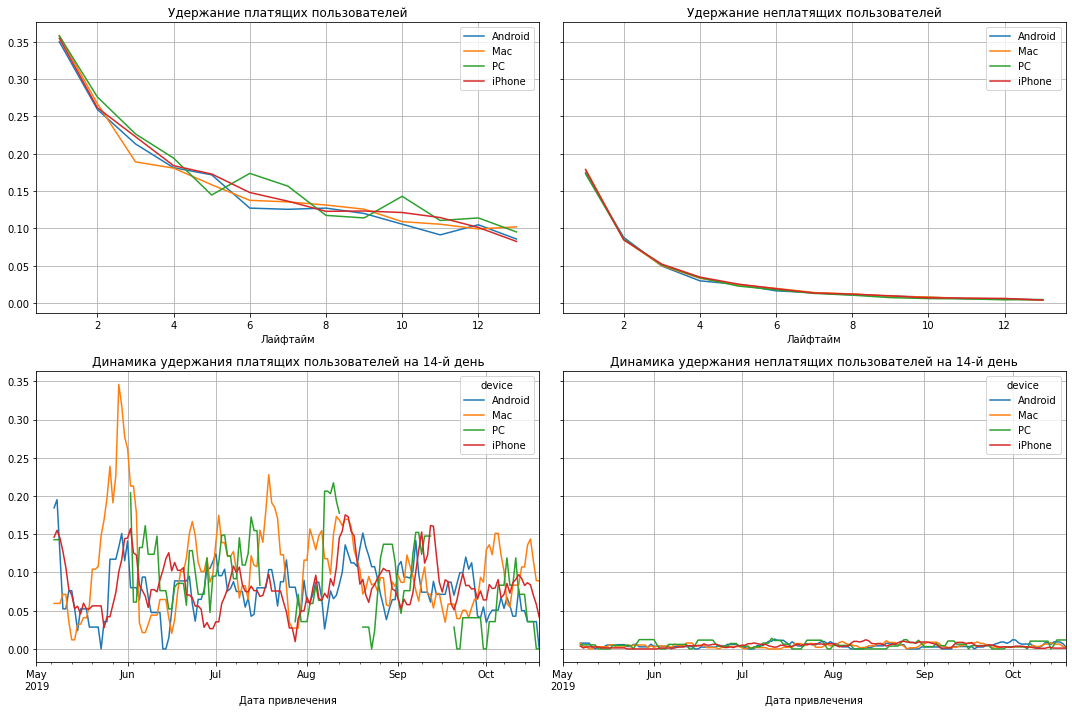

In [82]:
plot_retention(
 retention_us_device, 
 retention_history_us_device,
 horizon_days);

Точно также - удержание пользователей различных устройств в целом равно, поэтому здесь никаких "открытий".

In [83]:
#строим конверсию в разрезе девайсов
(conversion_raw_us_device,
 conversion_us_device,
 conversion_history_us_device) = get_conversion(
    profiles.query('region == "United States"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'])

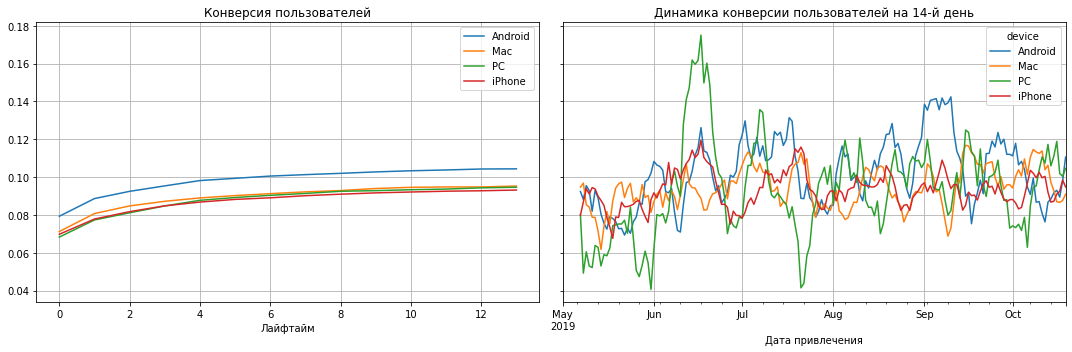

In [84]:
plot_conversion(
 conversion_us_device,
 conversion_history_us_device,
 horizon_days);

Пользователи из США, заходящие в приложение через устройства на Android-платформе, конвертируются чуть лучше. Однако остальные метрики равны, поэтому придавать сильное значение мы не будем. Однако как дополнительный способ улучшения качества рекламных кампаний, можно порекомендовать обратить внимание именно на пользователей Андроид. 

### Отдельно рассмотрим пользователей из Европы в разрезе по устройствам

In [85]:
#строим ltv, roi, cac в разрезе по устройствам
(ltv_raw_eu_device,
ltv_eu_device,
ltv_history_eu_device,
roi_eu_device,
roi_history_eu_device) = get_ltv(
    profiles.query('channel != "organic" and region != "United States"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'])

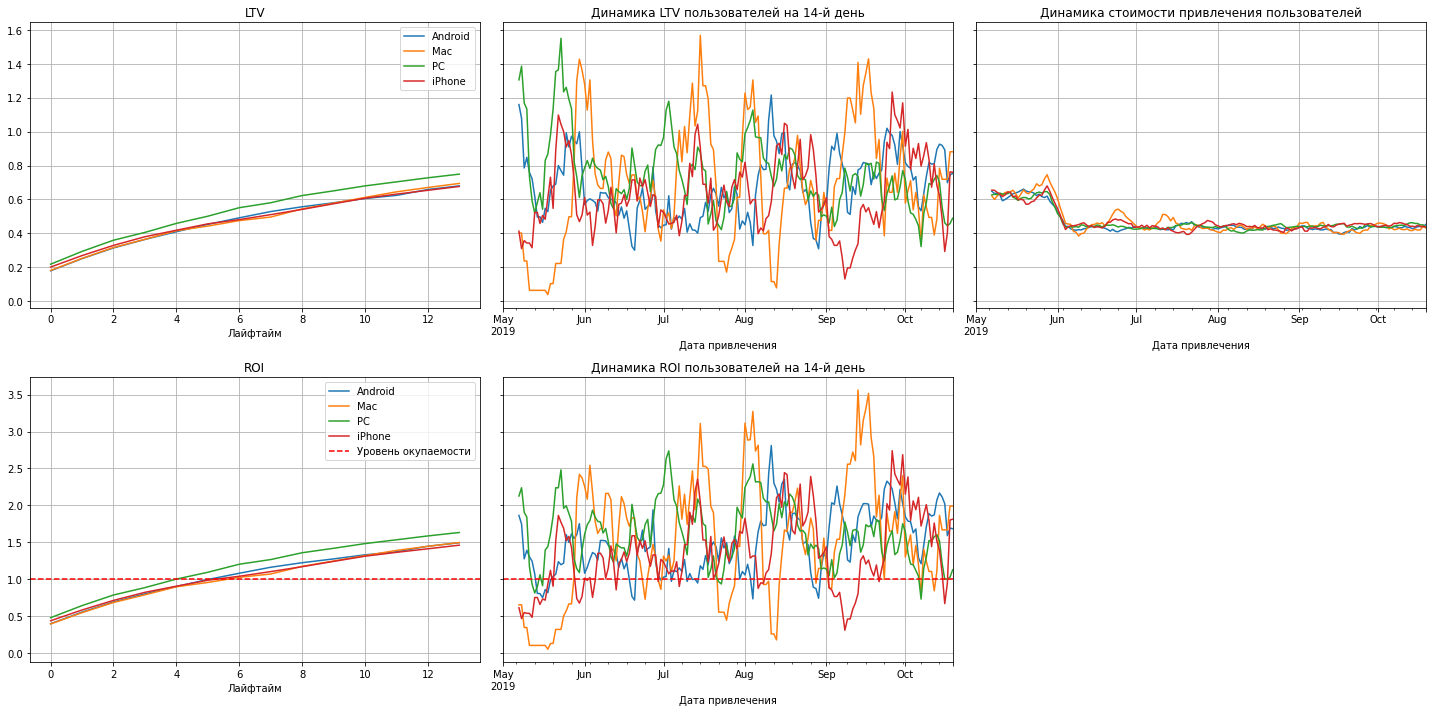

In [86]:
plot_ltv_roi(ltv_eu_device,
ltv_history_eu_device,
roi_eu_device,
roi_history_eu_device, horizon_days)

Кампании по привлечению пользователей из Европы стабильно окупаются на всех устройствах. На графике Динамики ROI видно, что пользователи ПК стабильно выше уровня окупаемости, и ПК немного выше на графике LTV.

In [87]:
#проверим удержание
(retention_raw_eu_device,
 retention_eu_device, 
 retention_history_eu_device) = get_retention(
    profiles.query('region != "United States"'), 
    visits, 
    observation_date, 
    horizon_days,
    dimensions=['device'])

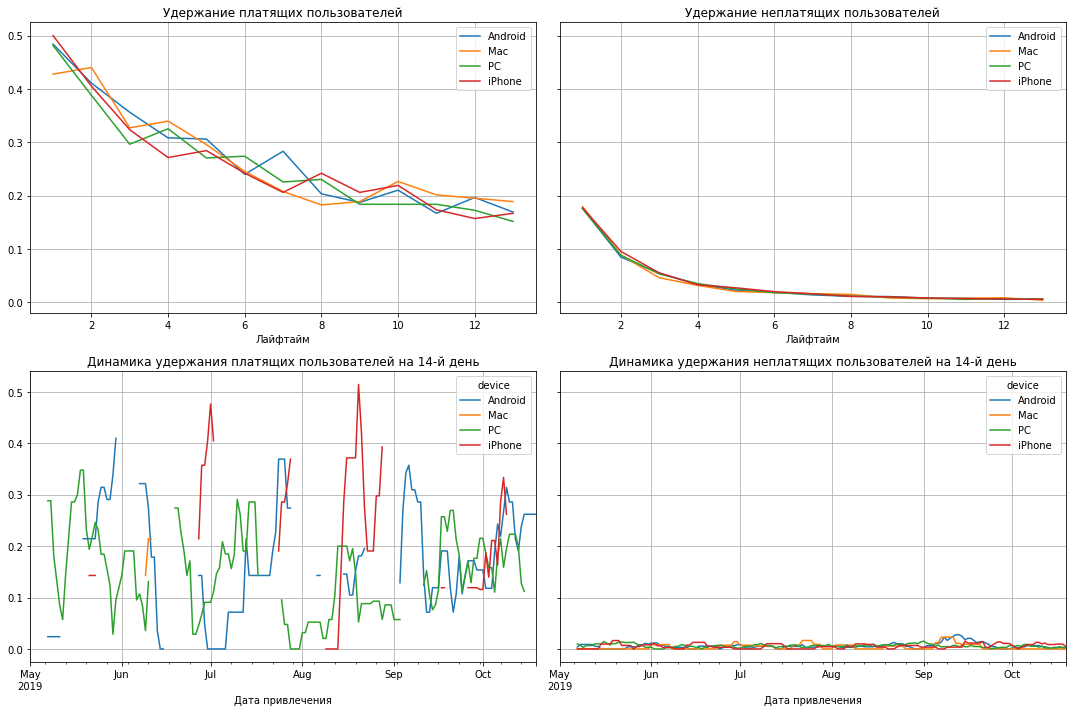

In [88]:
plot_retention(
 retention_eu_device, 
 retention_history_eu_device,
 horizon_days);

Удержание равномерно для пользователей всех устройств.

In [89]:
#проверим конверсию
(conversion_raw_eu_device,
 conversion_eu_device,
 conversion_history_eu_device) = get_conversion(
    profiles.query('region != "United States"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'])

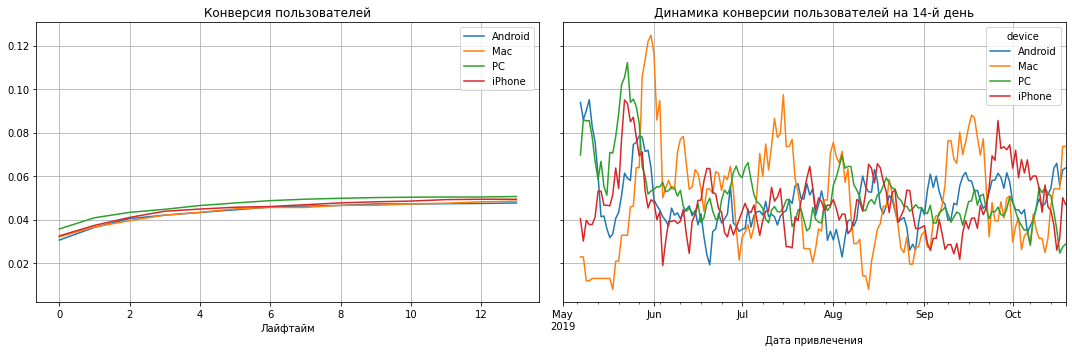

In [90]:
plot_conversion(
 conversion_eu_device,
 conversion_history_eu_device,
 horizon_days);

Конверсия пользователей PC немного выше, чем. пользователей остальных устройств. На фоне более стабильной динамики ROI этих же пользователей, также можно дать просто общую рекомендацию, в будущем спланировать отдельный рекламный блок для таких пользователей.

### Предварительный вывод:
Рассмотрение в разбивке по устройствам отдельно пользоателей США и Европы показало, что особых перевесов какого-то устройства нет, но можно отдельно спланировать рекламные кампании для чуть лучше конвертирующихся устройств: Андроид для США, и ПК для Европы.

## Общий вывод:

Необходимо было ответить на следующие вопросы:

Окупается ли реклама, направленная на привлечение пользователей в целом?  
Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?  
Чем могут быть вызваны проблемы окупаемости?  

По результатам исследования можно сказать:
- общая рекламная кампания НЕ окупается, и даже нет тенденции к окупаемости с учетом текущих показателей.
- на плохие результаты кампании сильнее всего влияет рекламная стратегия по привлечению пользователей из США через каналы FaceBoom и TipTop.
- предложение для пользователей, формируемое через канал FaceBoom, вероятно, не соответствует ожиданиям потребителей; они совершают одну покупку и далее не возвращаются.
- стоимость привлечения одного пользователя из США через канал TipTop сильно завышена. Необходимо сократить этот показатель, чтобы выровнять окупаемость.
- стоит обратить внимание на потенциально прибыльный канал привлечения -  RocketSuperAds.
- для Европейских стран аналогичная ситуация с каналом AdNonSense - чем-то рекламная кампания заинтересовывает посетителей, но только один раз: высокая конвертация и низкое удержание.
- завышенный бюджет канала AdNonSense можно распределить на другие также перспективные каналы привлечения, такие как lambdaMediaAds.

## Финальные выводы:


Основные причины неэффективности привлечения пользователей на текущий момент такие:
- слишком высокая растущая цена пользователя из США, привлекаемого через канал TipTop
- низкое удержание пользователей из США, привлекаемых через канал FaceBoom
- завышенная стоимость пользователя, привлекаемого через FaceBoom
- низкое удержание пользователей из Европы, привлекаемых через канал AdNonSense
- завышенная стоимость пользователя, привлекаемого через AdNonSense

Наиболее важным сейчас, после шести месяцев неокупающейся рекламы, будет быстро разрешить вопрос с завышенным бюджетом на одного пользователя из США у канала TipTop.  
Стоит проанализировать - может быть выбран неверный метод оплаты рекламы (просмотры, а не клики), может просто рекламный канал стал слишком дорогим. Но именно снижение стоимости одного пользователя, привлеченного через канал TipTop, до усредненных показателей, поможет быстро вывести рекламную кампанию в окупаемость.  

Следующим важным этапом будет анализ рекламного предложения для клиентов из США, размещенное на канале FaceBoom. Именно с этого канала стоит начать корректировку, так как пользователи из США составляют основную долю пользователей приложения. Стоит проверить, по какой причине большинство пользователей уходят после первой оплаты. Для анализа в рамках текущего исследования недостаточно данных.  

Точно также стоит проанализировать рекламное предложение для пользователей из Европы, привлекаемых через канал AdNonSense. Схожая картина - большинство покупателей уходят после первой покупки. Однако стоит заметить, что рекламная кампания в Европе носит окупаемый характер, поэтому данная рекомендация позволит улучшить показатели, но не кардинально изменить картину в целом по всем рынкам.  

Впоследствие, после решения первых задач, стоит пересмотреть распределение рекламного бюджета в сторону перспективных каналов привлечения. Для США был выделен канал RocketSuperAds, для Европы - lambdaMediaAds. И также можно запустить "спецпредложения" для пользователей с устройствами Android в США, и пользователей PC в Европе.